# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
#Using Jupyter and libraraies already installed

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# Jupyter notebook was used

In [4]:
# Load the csv file into the dataframe rom local drive
df = pd.read_csv('foodhub_order.csv') 

In [5]:
# Provide the first 5 rows in the dataframe
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Provide the number of rows and columns in the dataframe
df_shape = np.array(df.shape) 
print('There are', df_shape[0],'rows and', df_shape[1], 'columns')

There are 1898 rows and 9 columns


#### Observations:
There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Provide information on the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Of the 1898 rows, there are no null values
- Order_id, customer_id, food_preparation_time and delivery_time are numerical values
- Restaurant_name, cuisine_type and day_of_the_week are of object type 
- Cost_of_the_order is a floating value
- Rating is an object data type instead of an integer type and should be investigated further 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Determine null values within the DataFrame and sum the counts into column buckets
df_null = pd.DataFrame(df.isnull().sum()).reset_index()

# Print the results of the missing value analysis
# Declare report variables
issues=0
text1 = 'Column'
text2 = 'Result'

# Print report framework
print('Evaluation of missing values in DataFrame:')
print('-'*55)
print(f'{text1:<30}{text2}')

# Print results of missing value analysis by column
for i in range(len(df_null)):
    if df_null.iloc[i,1] != 0:
        print(f'{df_null.iloc[i,0]:<30}{df_null.iloc[i,1]} missing values')
        issues += df_null.iloc[i,1]
    else:
        print(f'{df_null.iloc[i,0]:<30}has no missing values')
        
# Print total number, if exists, of missing values in DataFrame        
if issues == 0:
    print('There are no missing values in the DataFrame')
else:
    print('There are', issues, 'missing values in the DataFrame')
              

Evaluation of missing values in DataFrame:
-------------------------------------------------------
Column                        Result
order_id                      has no missing values
customer_id                   has no missing values
restaurant_name               has no missing values
cuisine_type                  has no missing values
cost_of_the_order             has no missing values
day_of_the_week               has no missing values
rating                        has no missing values
food_preparation_time         has no missing values
delivery_time                 has no missing values
There are no missing values in the DataFrame


#### Observations:
- There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Format float values to 2 decimal places, suppressing the scientific notation format
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Include both numerical and categorical values in the statistical analysis. Transpose the data.
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
- There are 178 different restaurants serving 14 different cuisine types
- Shake Shack has the highest number of orders at 219
- American cuisine is the most popular type of cuisine
- Most orders are placed during the weekend
- The ratings for restaurants have a large number of 'Not Given' values which needs to be investigated further
- The cost of orders placed range from \\$4.47 to \\$35.71 with an average price of \\$16.50
- The average cost of orders is slighter higher than the 50th percentile indicating a possible slight right skew
- Food preparation times range from 20 minutes to 35 minutes with an average time of approximately 27 minutes
- The average food preparation time is close to the 50th percentile indicating a possible normal distribution
- Delivery times range from 15 minutes to 33 minutes with an average time of approximately 24 minutes
- The average delivery time is close to the 50th percentile indicating a possible normal distribution
 

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Count the unique values in the rating column
df_rating = df.groupby(['rating'])['order_id'].count().reset_index() 

# Print the count of any orders with a rating value that is not an expected rating
cnt = df_rating['rating'].count()
for i in range(cnt):
    if df_rating.iloc[i,0].isdigit() == False:
        print('There are ', df_rating.iloc[i,1], ' orders with a non-integer value of "', df_rating.iloc[i,0], '".', sep='' )

There are 736 orders with a non-integer value of "Not given".


#### Observations:
- There are 736 orders not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order Id

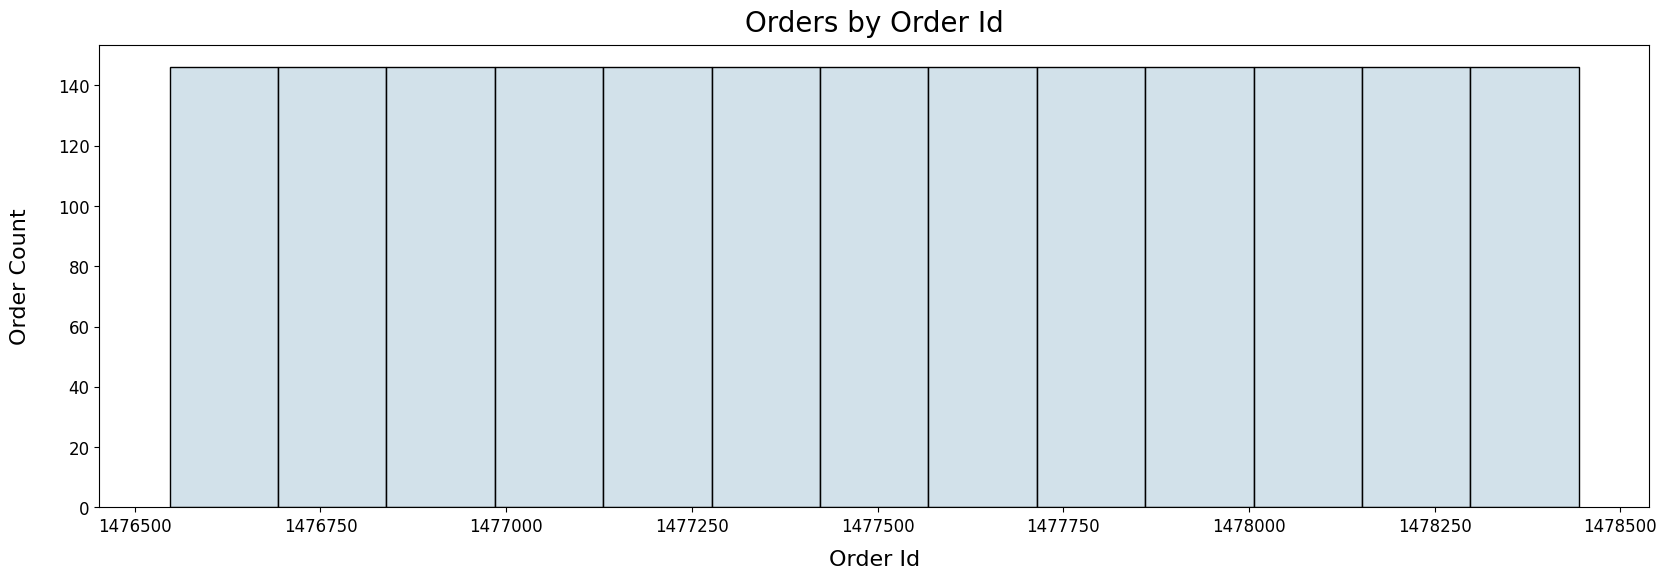

In [11]:
# Create a histogram of the column order_id
plt.figure(figsize=(20,6))
plt.title('Orders by Order Id', fontsize=20, pad=10)
plt.xlabel('Order Id', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = sns.histplot(data = df, x='order_id', color='#C3D7E3')
ax.ticklabel_format(style='plain')
plt.show()  

#### Observations on Order Id:
 - The order id field appears to be sequential given the equality of order counts from the binned order ids

#### Customer Id

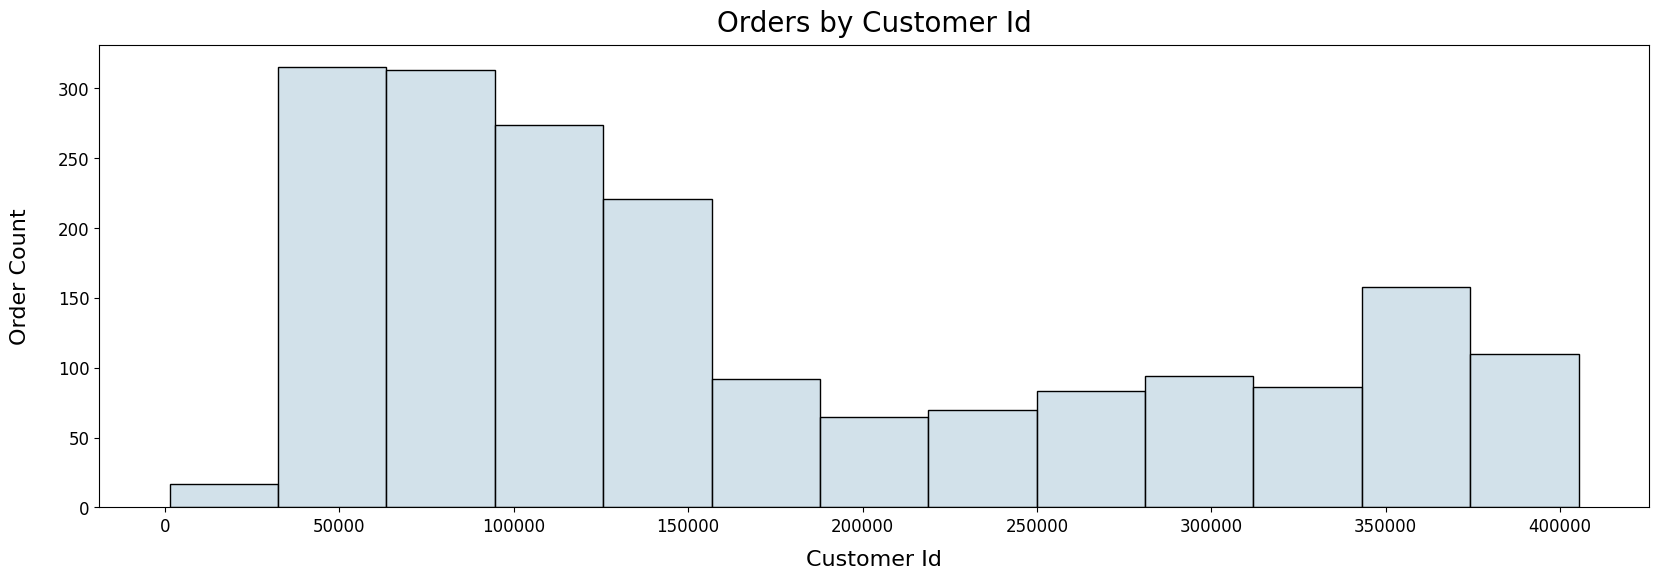

In [12]:
# Create a histogram of the column customer_id
plt.figure(figsize=(20,6))
plt.title('Orders by Customer Id', fontsize=20, pad=10)
plt.xlabel('Customer Id', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(data = df, x='customer_id', color='#C3D7E3')
plt.show()  

#### Observations on Customer Id:
 - If the customer id value is sequential, the number of orders placed by early adapters of the application is larger than newer customers.
 - If the customer id is assigned by neighborhood

#### Customer Type

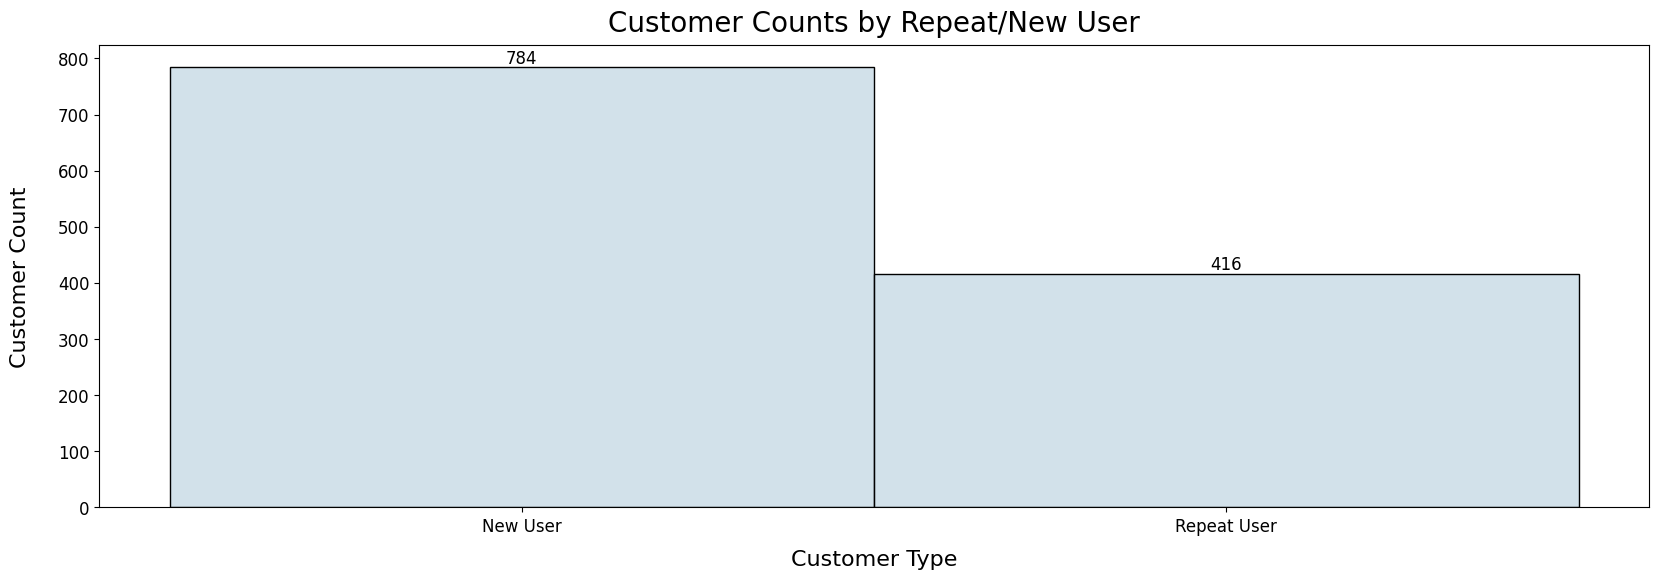

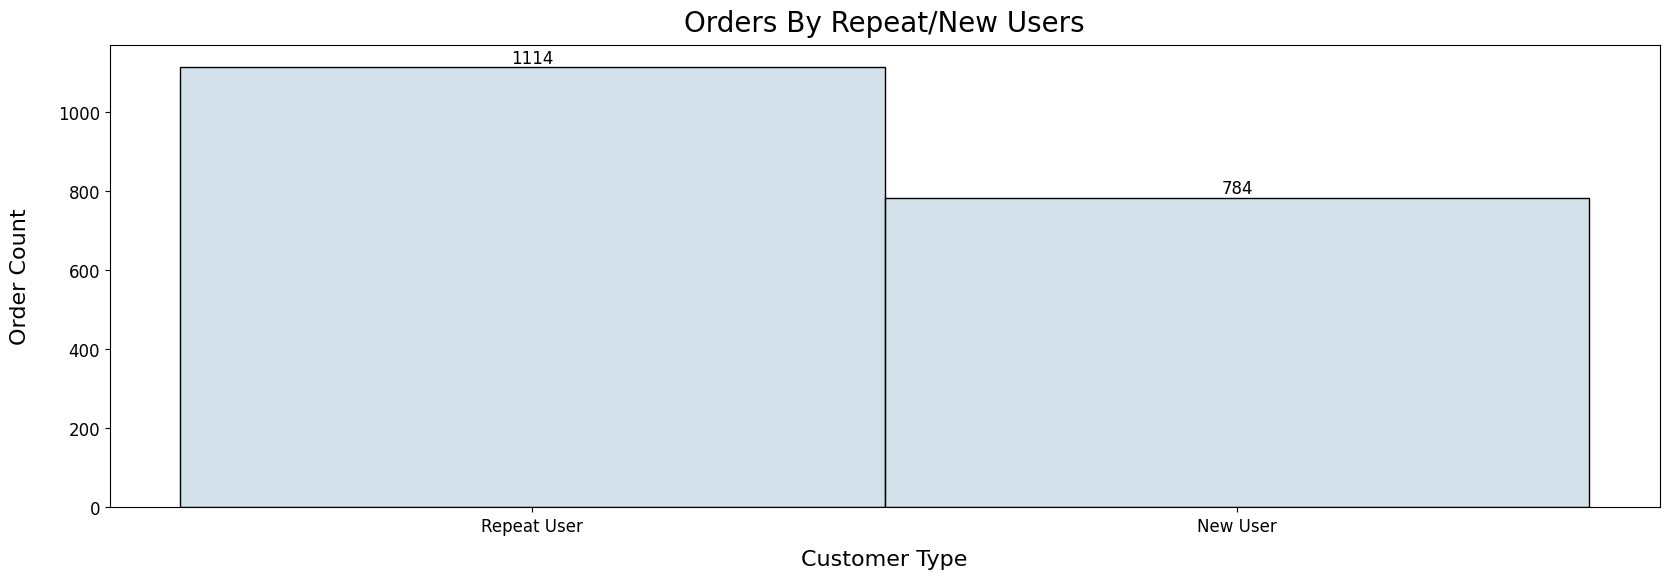

In [13]:
# Retrieve order counts by customer id
df_unique = df.groupby(['customer_id'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_unique.rename(columns={'order_id':'order_count'},inplace=True)

# Retrieve a unique count of customer ids
x = df_unique['customer_id'].count()

# Create aa new column called customer_type
# To be used in classifying customers as new users or repeat users
df_unique['customer_type']='New User'

# Determine whether a customer is new or repeat user
for i in range(x):
    if df_unique.iloc[i,1] != 1:
        df_unique.loc[i,'customer_type'] = 'Repeat User'
df_unique.drop(['order_count'], axis=1, inplace=True)        

# Create a histogram of unique customer counts by new customers vs repeat customers
plt.figure(figsize=(20,6))
plt.title('Customer Counts by Repeat/New User', fontsize=20, pad=10)
plt.xlabel('Customer Type', fontsize=16, labelpad=10)
plt.ylabel('Customer Count', fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1 =sns.histplot(data = df_unique, x='customer_type', color='#C3D7E3')
ax1.bar_label(ax1.containers[0], fontsize=12) # show the value amounts in the graph
plt.show()  


# Merge the customer type with the original DataFrame
df_combine = pd.merge(df, df_unique, how='inner', on='customer_id')   

# Create a histogram of order counts associated with new users customers vs repeat users
plt.figure(figsize=(20,6))
plt.title('Orders By Repeat/New Users', fontsize=20, pad=10)
plt.xlabel('Customer Type', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = sns.histplot(data = df_combine, x='customer_type', color='#C3D7E3')
ax2.bar_label(ax2.containers[0], fontsize=12)
plt.show()  

#### Observations on Customer Type:
- Repeat users are 34%  of the customer total and order 58% of total orders

#### Restaurant Name

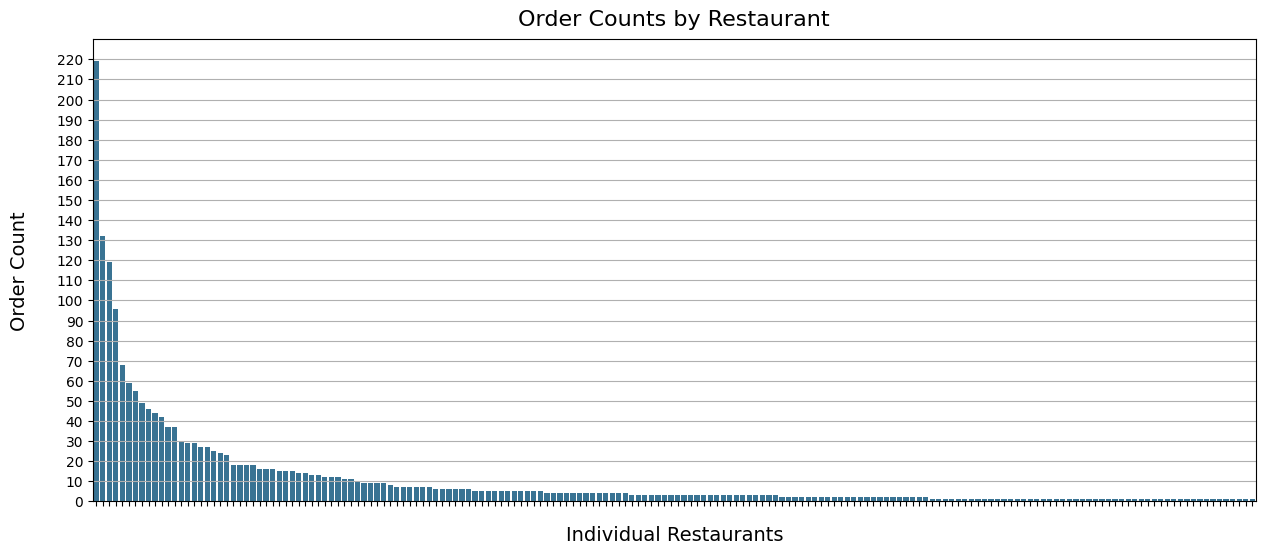

In [14]:
# Create a countplot of the restaurant name
# Do not include restaurant name for cleanliness
plt.figure(figsize=(15,6))
plt.title('Order Counts by Restaurant', fontsize=16, pad=10)
plt.xlabel('Individual Restaurants', fontsize=14, labelpad=10)
plt.ylabel('Order Count', fontsize=14, labelpad=20)
plt.yticks(np.arange(0, 300, step=10), fontsize=10)
plt.gca().set_xticklabels([]) #Hide the xtick labels
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().index, color='#2A77A2')
plt.grid(axis='y')
plt.show()  

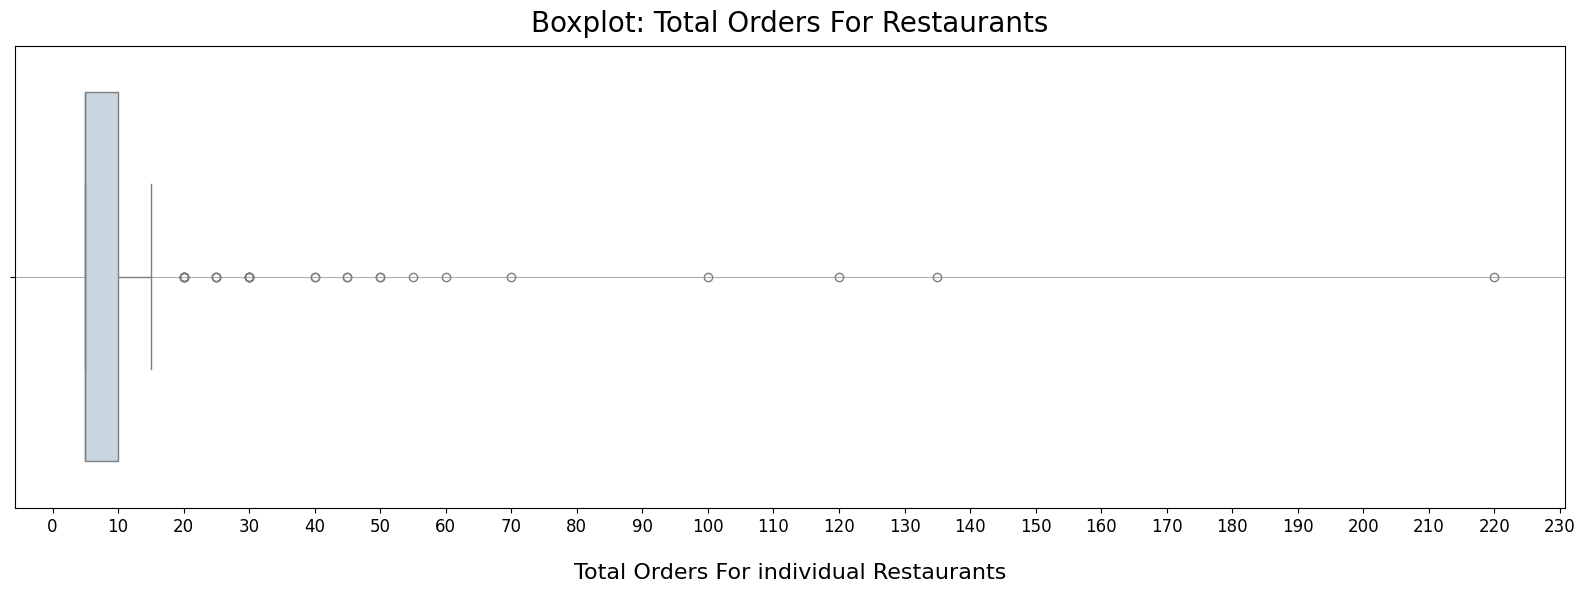

In [15]:
# Restaurants are bucketed together in counts of 5 orders

#Place restaurants into a bucket category that is grouped by 5 orders
df_unique = df.groupby(['restaurant_name'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_unique.rename(columns={'order_id':'order_count'},inplace=True)

# Retrieve a unique count of restaurants 
x = df_unique['restaurant_name'].count()

# Create aa new column called restaurant bucket
# To be used in placing restaurants within a bucket based on the number of orders placed
df_unique['restaurant_bucket']=0

# Define range variable
y = df_unique['order_count'].max()+5

# Determine the bucket a restaurant would belong to based on the numbers of orders created
# Each buckets category is in steps of 5 orders sold (i.e, 5, 10, 15, 20, etc...)
for i in range(5,y,5):
    for j in range(x):
        if df_unique.iloc[j,1] <= i and df_unique.iloc[j,2] ==0:
            df_unique.loc[j,'restaurant_bucket'] = i

# Create a boxplot of restaurant counts by of orders bucketed(5)
plt.figure(figsize=(20,6))
plt.title('Boxplot: Total Orders For Restaurants', fontsize=20, pad=10)
plt.xlabel('Total Orders For individual Restaurants', fontsize=16, labelpad=20)
plt.xticks(np.arange(0, 300, step=10), fontsize=12)
sns.boxplot(data=df_unique, x='restaurant_bucket', color='#C3D7E3')
plt.grid(axis='y')
plt.show()  



#### Observations on Restaurant Name:
- 75% of restaurants have 10 or fewer orders placed on the application
- Total orders by restaurant bucket is right skewed
- A small collection of restaurants has order counts outside of the right whisker

#### Cost of the Order

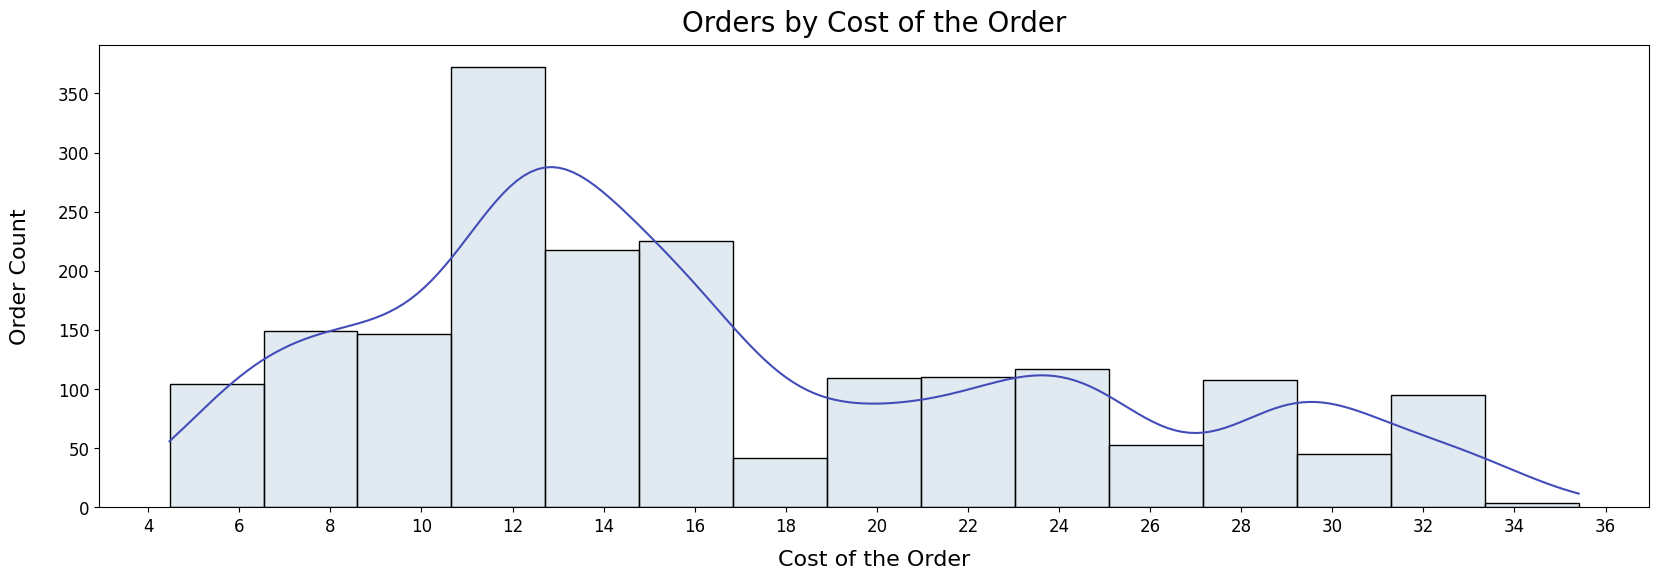

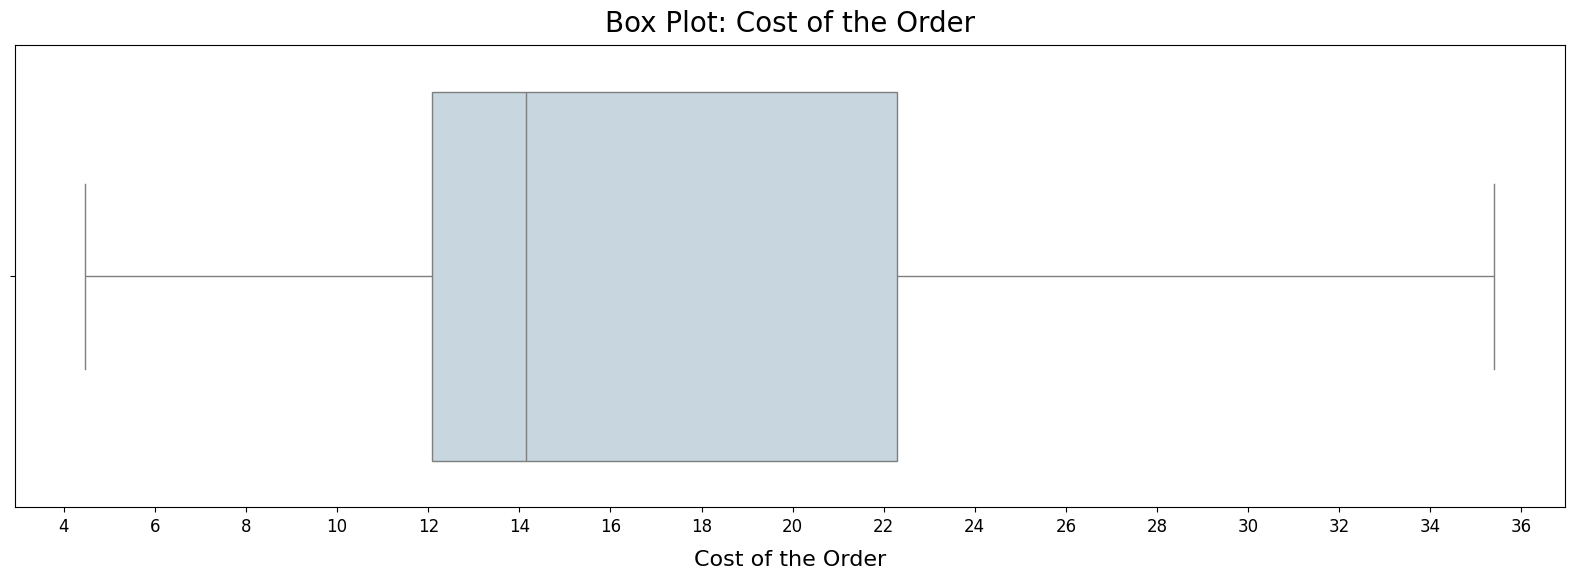

In [16]:
# Create a histogram of the cost_of_the_order column
plt.figure(figsize=(20,6))
plt.title('Orders by Cost of the Order', fontsize=20, pad=10)
plt.xlabel('Cost of the Order', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=20)
plt.xticks(np.arange(0, 38, step=2), fontsize=12)
plt.yticks(fontsize=12)
ax = sns.histplot(data = df, x='cost_of_the_order', kde=True, binwidth=2, color='#C3D7E3')
ax.lines[0].set_color('#444CBA')
plt.show()            

# Create a boxplot of the cost_of_the_order column
plt.figure(figsize=(20,6))
plt.title('Box Plot: Cost of the Order', fontsize=20, pad=10)
plt.xlabel('Cost of the Order', fontsize=16, labelpad=10)
plt.xticks(np.arange(0, 38, step=2), fontsize=12)
sns.boxplot(data = df, x='cost_of_the_order', color='#C3D7E3')
plt.show()

#### Observations on Cost of the Order:
- The median of the cost of orders is approximately \\$14 with a maximum about \\$36
- The distribution is right skewed with no outliers 
- Half of the orders fall between a cost of \\$12 and \\$23

#### Food Preparation Time

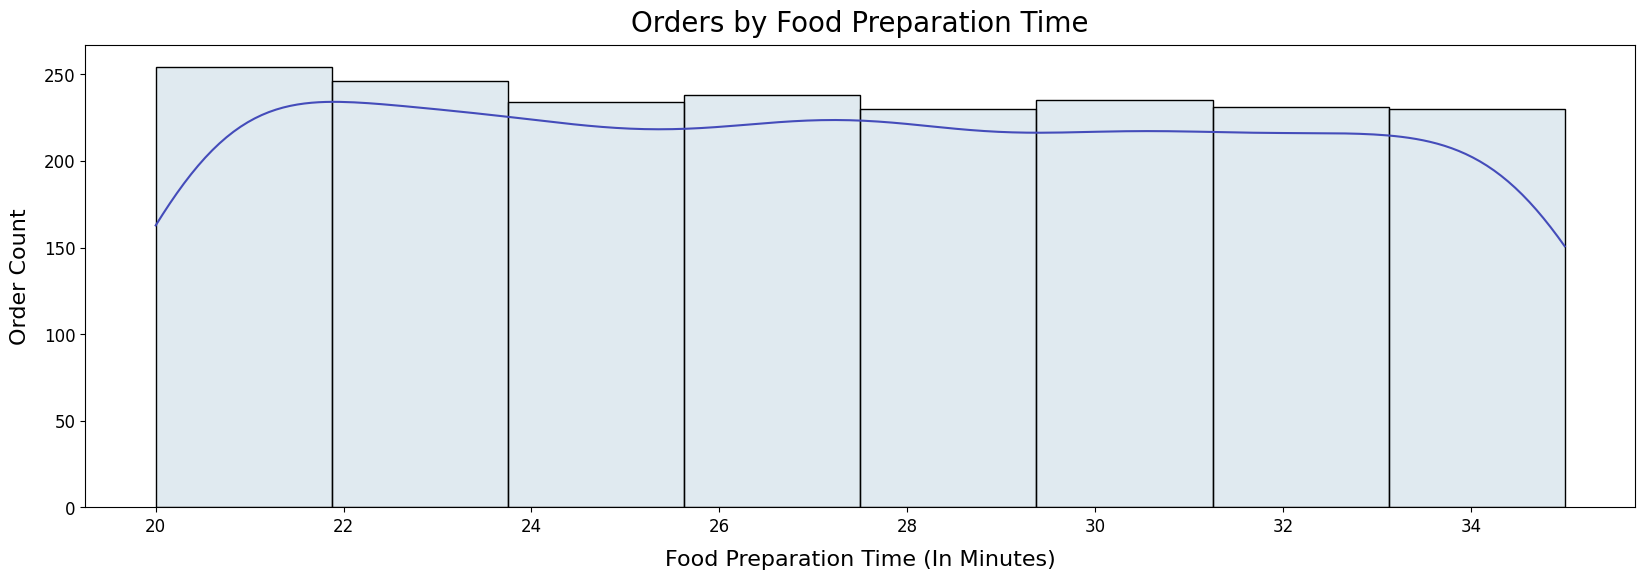

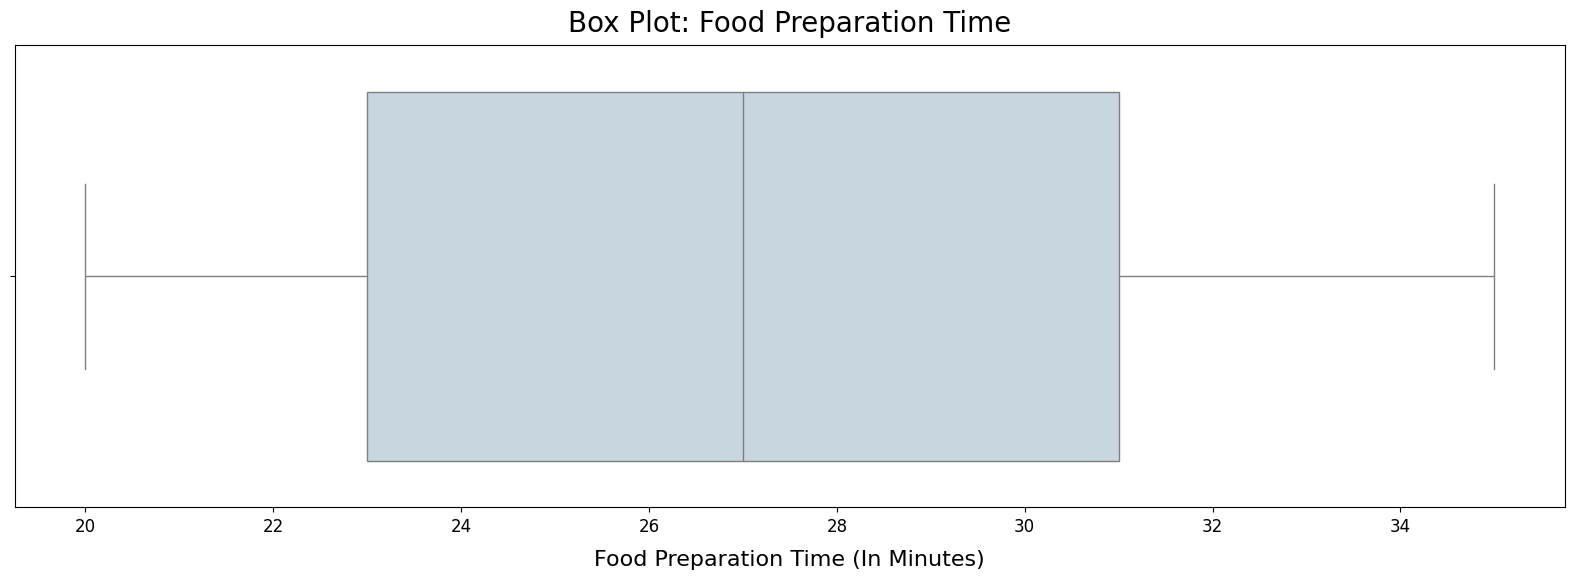

In [17]:
# Create a histogram of the food_preparation_time column
plt.figure(figsize=(20,6))
plt.title('Orders by Food Preparation Time', fontsize=20, pad=10)
plt.xlabel('Food Preparation Time (In Minutes)', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=10)
plt.xticks(np.arange(0, 38, step=2), fontsize=12)
plt.yticks(fontsize=12)
ax = sns.histplot(data = df, x='food_preparation_time', kde=True, binwidth=2, color='#C3D7E3')
ax.lines[0].set_color('#444CBA')
plt.show()            

# Create a boxplot of the food_preparation_time column
plt.figure(figsize=(20,6))
plt.title('Box Plot: Food Preparation Time', fontsize=20, pad=10)
plt.xlabel('Food Preparation Time (In Minutes)', fontsize=16, labelpad=10)
plt.xticks(np.arange(0, 38, step=2), fontsize=12)
sns.boxplot(data = df, x='food_preparation_time', color='#C3D7E3')
plt.show()

#### Observations on Food Preparation Time:
- The food preparation time is relatively uniform in distribution of the orders with no outliers
- The median of the preparation time is approximately 27 minutes
- Times range from 20 to 35 minutes

#### Delivery Time

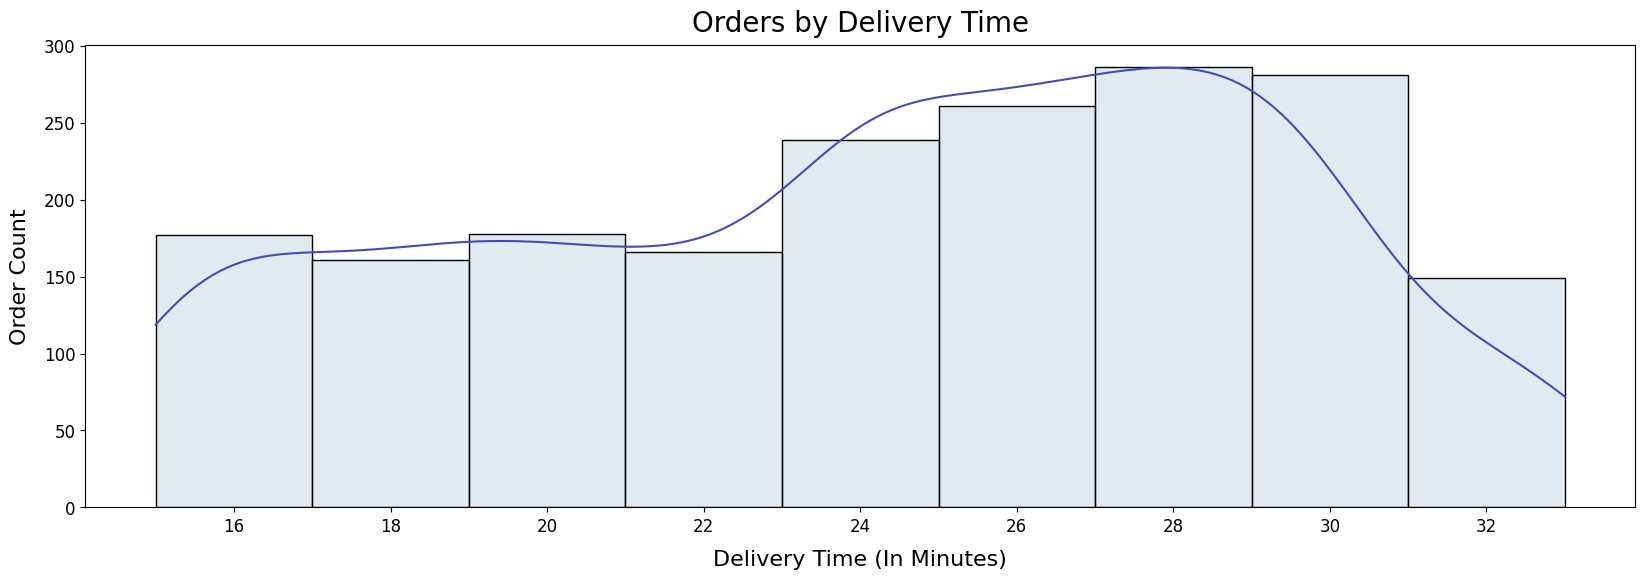

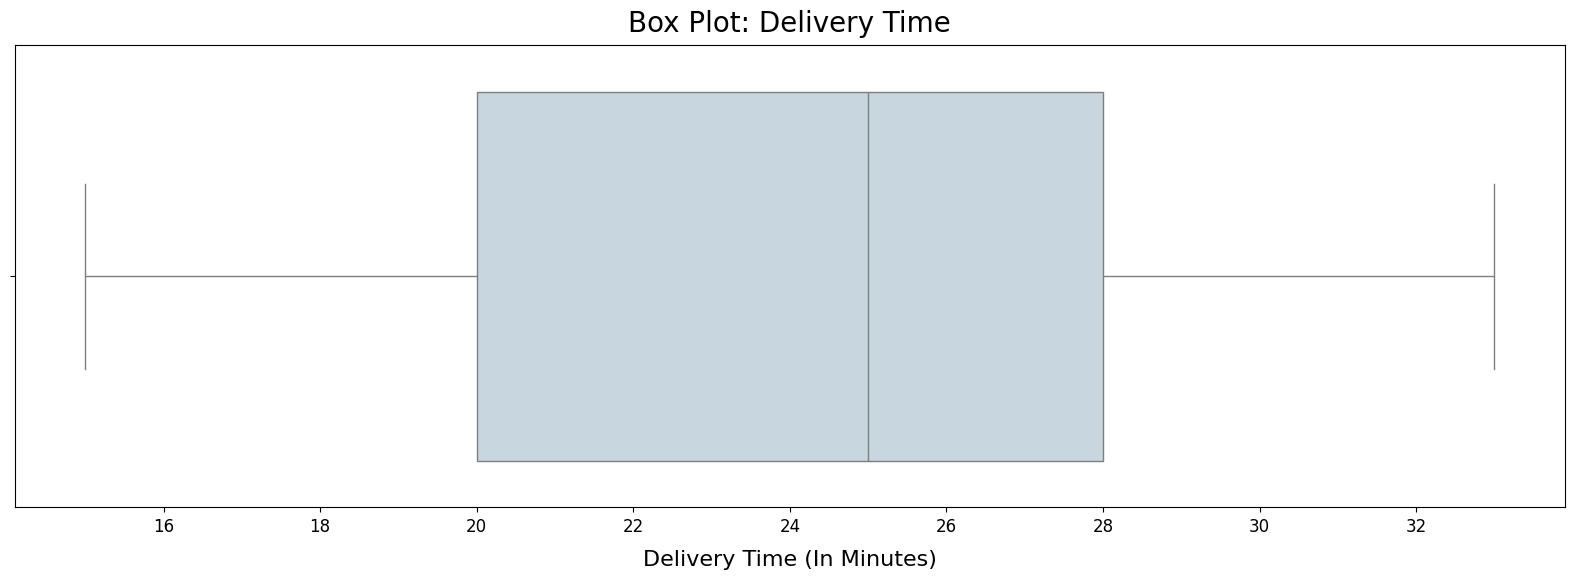

In [18]:
# Create a histogram of the delivery_time column
plt.figure(figsize=(20,6))
plt.title('Orders by Delivery Time', fontsize=20, pad=10)
plt.xlabel('Delivery Time (In Minutes)', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=10)
plt.xticks(np.arange(0, 36, step=2), fontsize=12)
plt.yticks(fontsize=12)
ax = sns.histplot(data=df, x='delivery_time', kde=True, binwidth=2, color='#C3D7E3')
ax.lines[0].set_color('#444CBA')
plt.show()

# Create a boxplot of the delivery_time column
plt.figure(figsize=(20,6))
plt.title('Box Plot: Delivery Time', fontsize=20, pad=10)
plt.xlabel('Delivery Time (In Minutes)', fontsize=16, labelpad=10)
plt.xticks(np.arange(0, 36, step=2), fontsize=12)
sns.boxplot(data=df, x='delivery_time', color='#C3D7E3')
plt.show()

#### Observations on Delivery Time:
- The median of the delivery time is approximately 25 minutes with a maximum 35 minutes
- The distribution is left skewed with no outliers 
- Half of the delivery times fall between 20 and 28 minutes

#### Cuisine Type

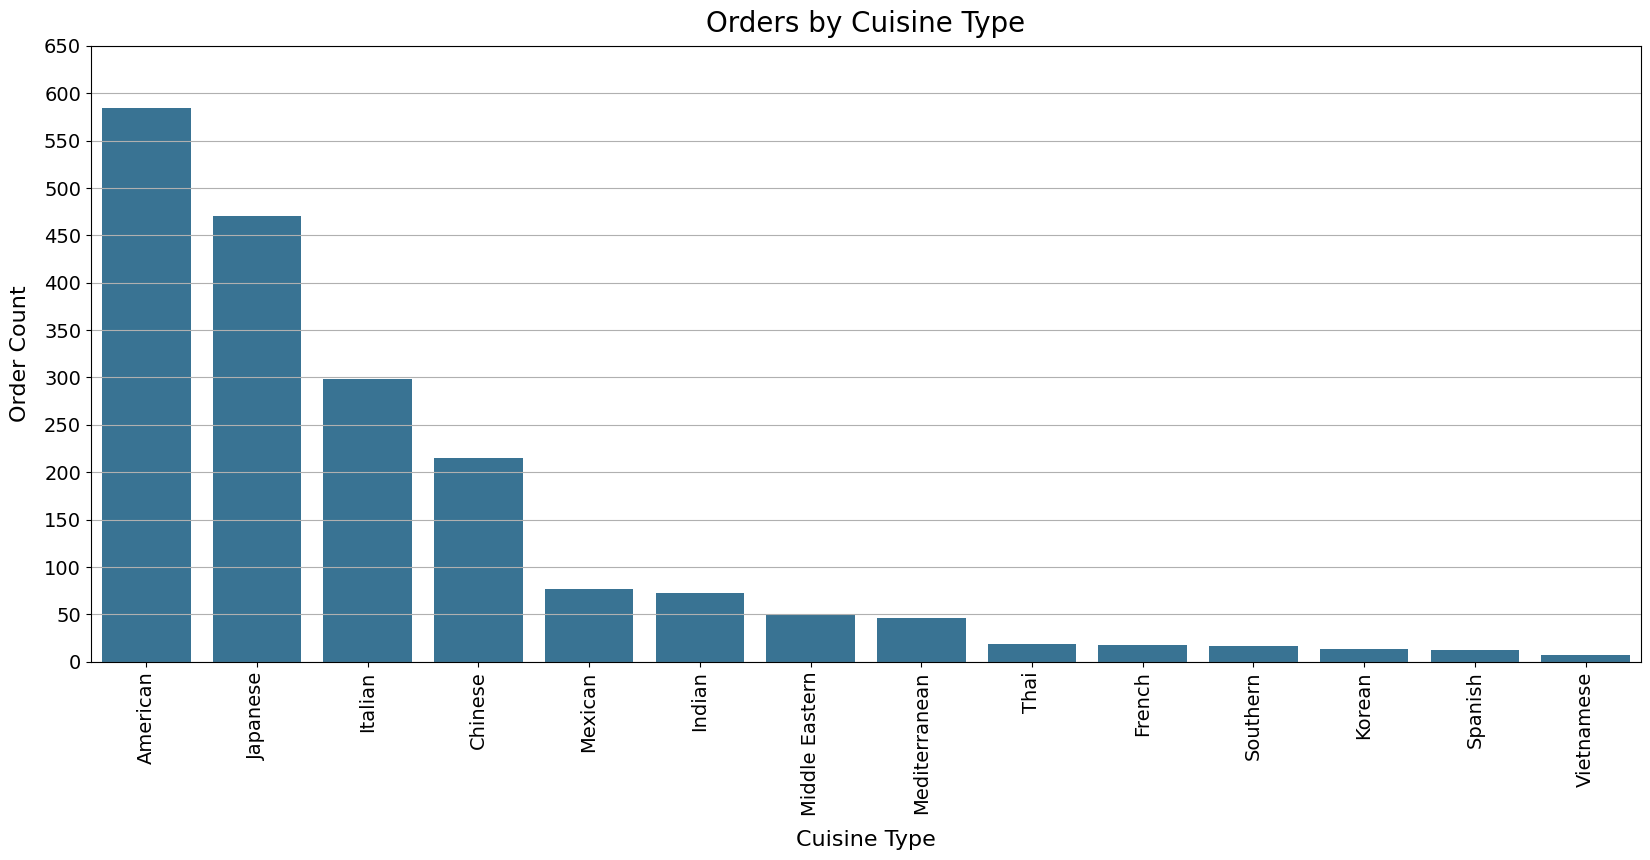

In [19]:
# Create a countplot of the cuisine_type column
plt.figure(figsize=(20,8))
plt.title('Orders by Cuisine Type', fontsize=20, pad=10)
plt.xlabel('Cuisine Type', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=10)
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, color='#2A77A2')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 700, step=50), fontsize=14)
plt.grid(axis='y')
plt.show()

#### Observations on Cuisine Type:
- American food is the most popular cuisine ordered, followed by Japanese, Italian, and Chinese restaurants
- Fewer than 50 orders are placed for Thai, French, Southern, Korean, Spanish, and Vietnamese restaurants

####  Day of the Week

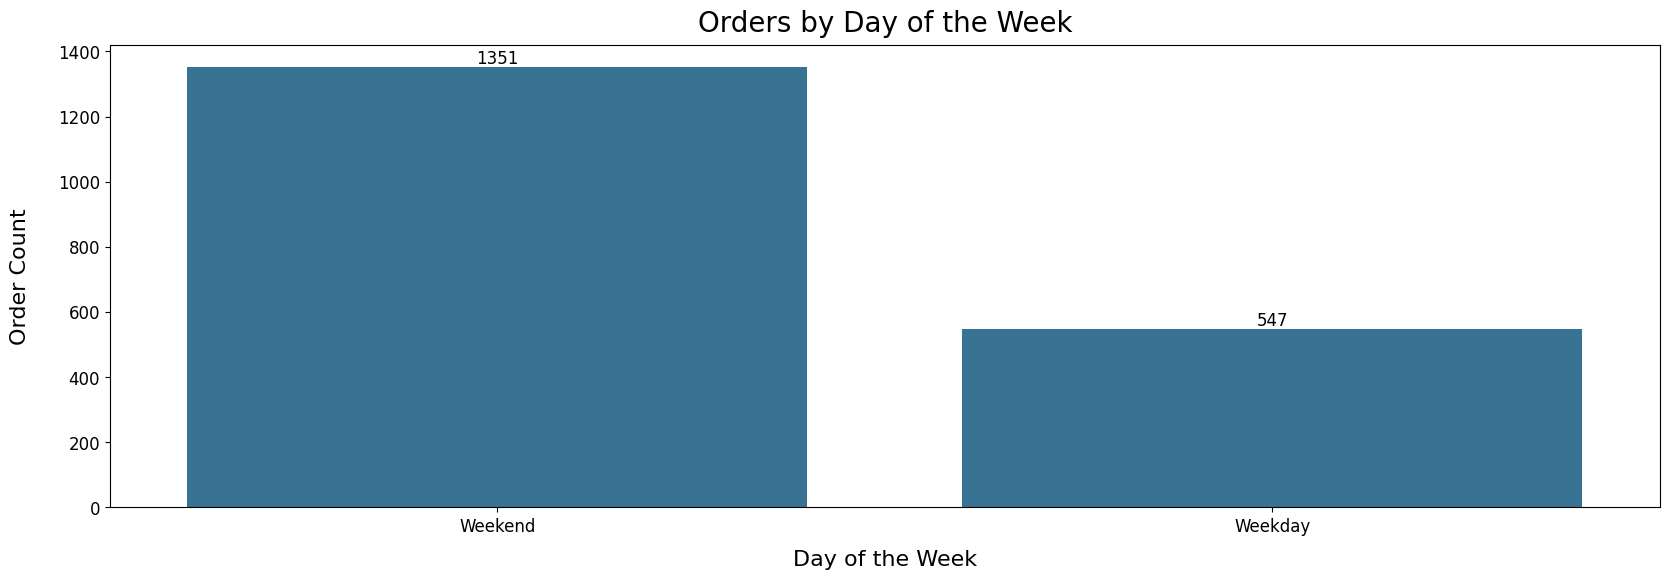

In [20]:
# Create a countplot of the day_of_the_week column
plt.figure(figsize=(20,6))
plt.title('Orders by Day of the Week', fontsize=20, pad=10)
plt.xlabel('Day of the Week', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = sns.countplot(data=df, x='day_of_the_week', color='#2A77A2')
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()


#### Observations on Day of the Week:
- Approximately 70% of orders are placed on the weekend 

#### Rating

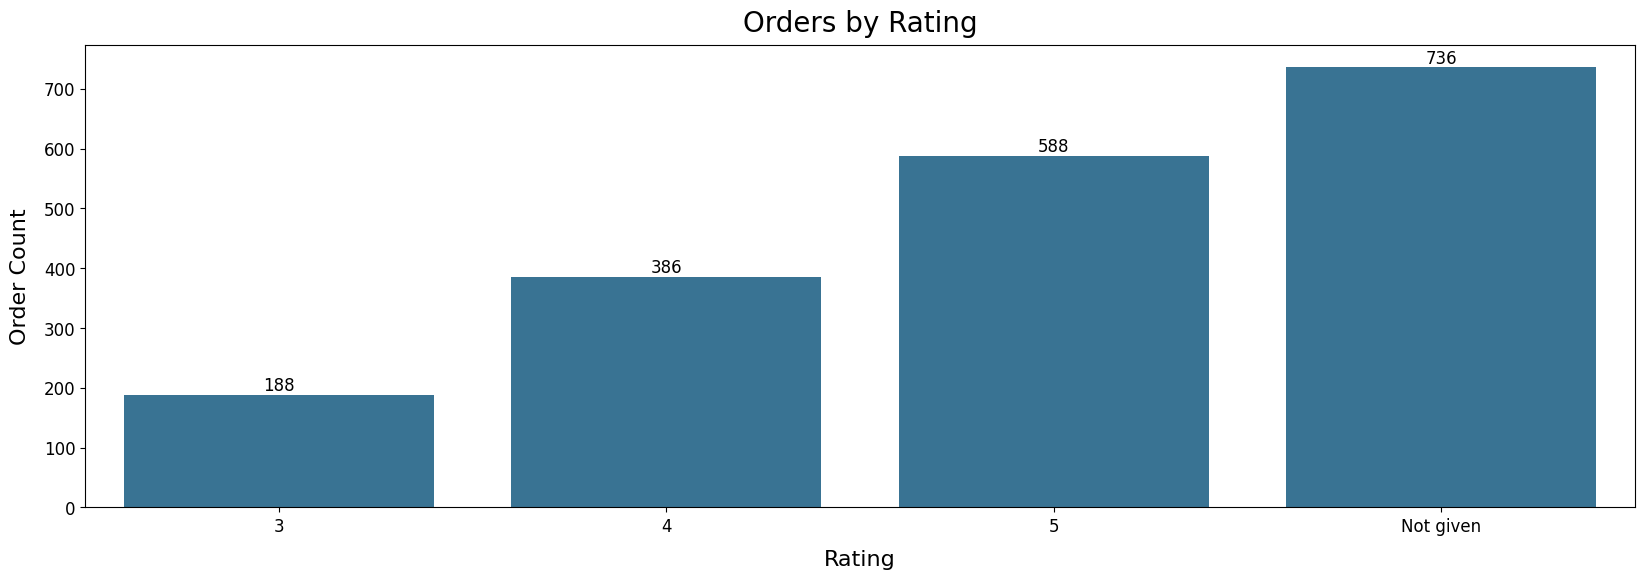

In [21]:
# Create a countplot of the rating column
plt.figure(figsize=(20,6))
plt.title('Orders by Rating',fontsize=20, pad=10)
plt.xlabel('Rating', fontsize=16, labelpad=10)
plt.ylabel('Order Count', fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = sns.countplot(data = df, x='rating', order=df['rating'].sort_values(), color='#2A77A2')
ax.bar_label(ax.containers[0], fontsize=12)
plt.show() 


#### Observations on Rating:
- 38% of orders do not have a rating given
- Ratings do not contain values of 1 or 2

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# Retrieve the order counts for each restaurant
df_ordercount = df.groupby(['restaurant_name'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_ordercount.rename(columns={'order_id':'order_count'}, inplace=True)

# Sort the results in descending order returning only the top 5 order counts
df_top5 = df_ordercount.sort_values(by='order_count', ascending=False).head(5).copy(deep=True)

# Print the top 5 restaurants
cnt = df_top5['restaurant_name'].count()
print('The top 5 restaurants are:')
for i in range(cnt):
    print(df_top5.iloc[i,0],': ', df_top5.iloc[i,1],  sep='')

The top 5 restaurants are:
Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


#### Observations:
- The top 5 restaurants in terms of orders are:
    - Shack Shack (219)
    - The Meatball Shop (132)
    - Blue Ribbon Sushi (119)
    - Blue Ribbon Fried Chicken (96)
    - Parm (68)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# Filter order by weekend value
wkendCuisine = df.loc[df['day_of_the_week']=='Weekend'].copy(deep=True)

# Count the filtered data by day of week and cuisine type
wkendCuisine = wkendCuisine.groupby(['day_of_the_week','cuisine_type'])['order_id'].count().reset_index()

# Rename the order_id column to order_count
wkendCuisine.rename(columns=({'order_id':'order_count'}),inplace=True)

# Sort the counts and return the top count
top_wkendCuisine = wkendCuisine.sort_values(by='order_count',ascending=False).head(1)
print('The most popular cuisine on the weekend is',top_wkendCuisine.iloc[0,1], 'with', top_wkendCuisine.iloc[0,2], 'orders.')


The most popular cuisine on the weekend is American with 415 orders.


#### Observations:
- The most popular cuisine ordered on the weekend is American food with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Retrieve the total number of orders
total_orders_count = df.iloc[:,0].count()

# Retrieve the total number of orders costing more than 20 dollars
filtered_order_count = df.loc[df['cost_of_the_order']>20]['order_id'].count() 

# Print the percentage calculation of orders costing more than 20 dollars
print('The percentage of orders costing more than 20 dollars is {:.2f}'.format(filtered_order_count/total_orders_count*100)) 


The percentage of orders costing more than 20 dollars is 29.24


#### Observations:
- The percentage of orders costing more than 20 dollars is 29.24

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Print the mean calculation of the delivery_time column. Format to 2 decimal places
print('The mean order delivery time is {:.2f} minutes'.format(df['delivery_time'].mean())) 

The mean order delivery time is 24.16 minutes


#### Observations:
- The average order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Count the orders by customer id
df_ordercnt = df.groupby(['customer_id'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_ordercnt.rename(columns=({'order_id':'order_count'}),inplace = True)

# Return the top 3 customers and their order counts
df_top3 = df_ordercnt.sort_values(by='order_count', ascending=False).head(3)

# Print the top 3 customer ids and the number of associated orders
cnt = df_top3['customer_id'].count()
print('The top 3 most frequenct customers are:')
for i in range(cnt):
    print('Customer Id ', df_top3.iloc[i,0], ' with ', df_top3.iloc[i,1], ' orders', sep='')
    

The top 3 most frequenct customers are:
Customer Id 52832 with 13 orders
Customer Id 47440 with 10 orders
Customer Id 83287 with 9 orders


#### Observations:
- The top 3 customers and their number of orders are:
    - Customer Id - 52832 (13)
    - Customer Id - 47440 (10)
    - Customer Id - 83287 (9)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## Correlation Analysis

#### Correlations of Cost of Order, Food Preparation Time, Delivery Time

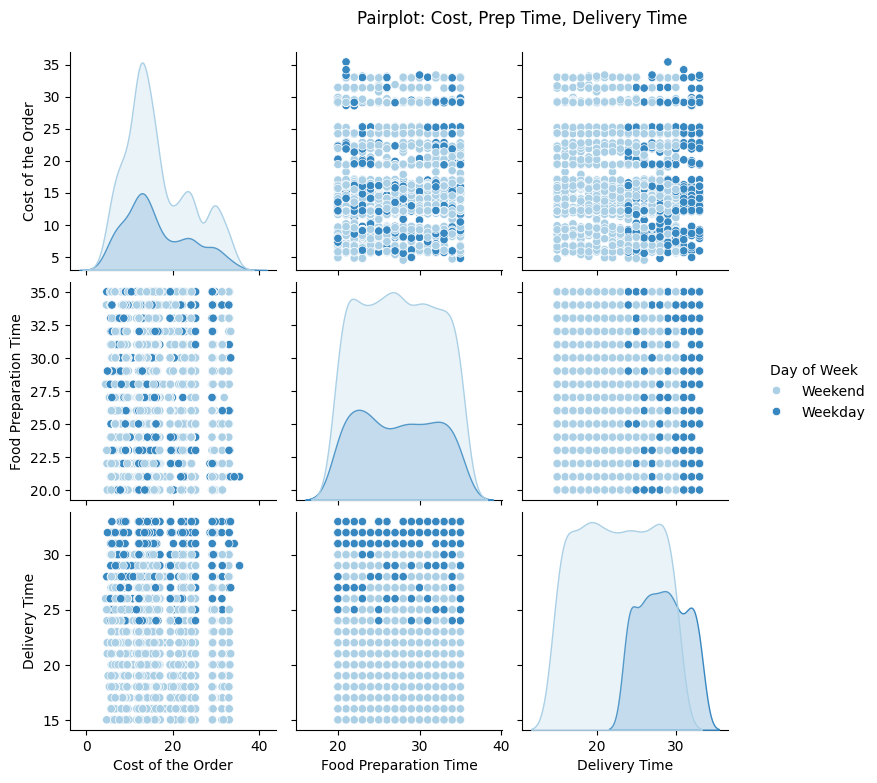

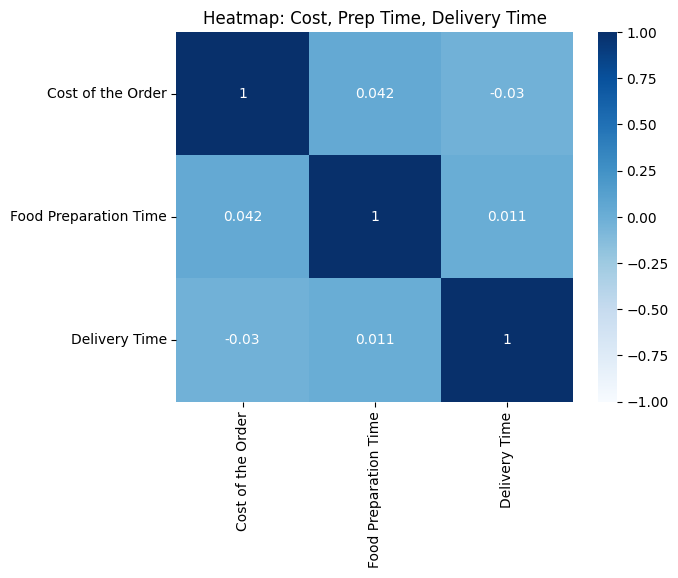

In [27]:
# Create a pairplot of the cost_of_the_order, food_preparation_time, and delivery_time
# Include day of the week as a hue
# Order_id and customer_id are not included due to the fact that these are unique object identifiers
ax = sns.pairplot(df, hue='day_of_the_week', palette='Blues',
             x_vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'],
             y_vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'],
            )
ax.axes[0,0].set_ylabel('Cost of the Order')    
ax.axes[1,0].set_ylabel('Food Preparation Time')
ax.axes[2,0].set_ylabel('Delivery Time')
ax.axes[2,0].set_xlabel('Cost of the Order')    
ax.axes[2,1].set_xlabel('Food Preparation Time') 
ax.axes[2,2].set_xlabel('Delivery Time')
ax._legend.set_title('Day of Week')
plt.title('Pairplot: Cost, Prep Time, Delivery Time', x=0, y=3.2)
plt.show()

# Create a heatmap of the cost_of_the_order, food_preparation_time, and delivery_time
ax = sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(),
                 annot=True, vmin=-1, vmax=1,
                 xticklabels=['Cost of the Order','Food Preparation Time','Delivery Time'],
                 yticklabels=['Cost of the Order','Food Preparation Time','Delivery Time']
                 ,cmap="Blues"
                )
plt.title('Heatmap: Cost, Prep Time, Delivery Time', x=0.5, y=1)
plt.show()

#### Observations:
 - There is no correlation between cost of the order, food preparation time, and delivery time

#### Correlation of the total cost, order count, restaurant count for cuisine types

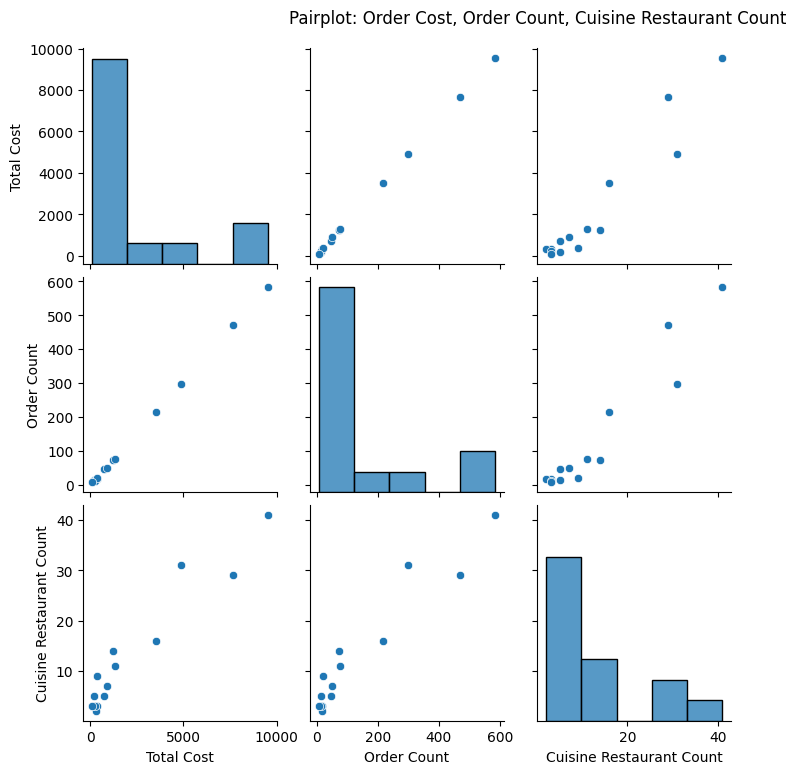

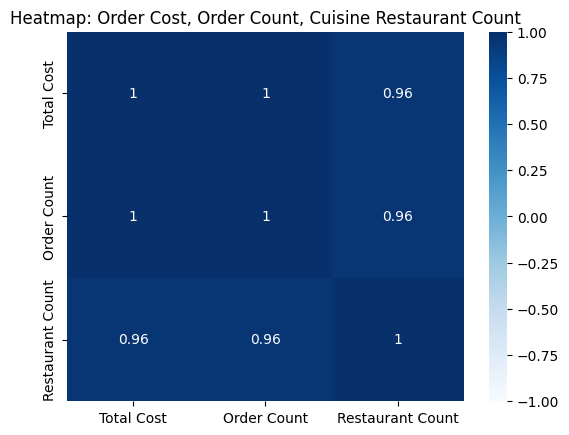

In [28]:
# Retrieve order count by cuisine type
df_order_count = df.groupby(['cuisine_type'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_order_count.rename(columns=({'order_id':'order_count'}), inplace=True)

# Retrieve restaurant count by cuisine type
df_rest_count = df.groupby(['cuisine_type','restaurant_name'])['order_id'].count().reset_index().copy(deep=True)
df_rest_count = df_rest_count.groupby(['cuisine_type'])['restaurant_name'].count().reset_index().copy(deep=True)

# Rename the restaurant_name column to restaurant_count
df_rest_count.rename(columns=({'restaurant_name':'restaurant_count'}), inplace=True)

# Retrieve order cost by cuisine type
df_order_cost = df.groupby(['cuisine_type'])['cost_of_the_order'].sum().reset_index().copy(deep=True)

# Rename the cost_of_the_order column to order_cost
df_order_cost.rename(columns=({'cost_of_the_order':'order_cost'}), inplace=True)

# Merge order count, restaurant count, and order cost by cuisine type
df_merge = pd.merge(df_order_count,df_rest_count, how='inner', on='cuisine_type')
df_merge = pd.merge(df_merge, df_order_cost, how='inner', on='cuisine_type')

# Create a pairplot of the order cost, cusine restaurant count, and order count
ax = sns.pairplot(df_merge, 
             x_vars=['order_cost', 'order_count', 'restaurant_count'],
             y_vars=['order_cost', 'order_count', 'restaurant_count'])
ax.axes[0,0].set_ylabel('Total Cost')    
ax.axes[1,0].set_ylabel('Order Count')
ax.axes[2,0].set_ylabel('Cuisine Restaurant Count')
ax.axes[2,0].set_xlabel('Total Cost')    
ax.axes[2,1].set_xlabel('Order Count') 
ax.axes[2,2].set_xlabel('Cuisine Restaurant Count')
plt.title('Pairplot: Order Cost, Order Count, Cuisine Restaurant Count', x=0, y=3.2)
plt.show()

# Create a heatmap of the order cost, restaurant count, and order count
ax = sns.heatmap(data=df_merge[['order_cost', 'order_count', 'restaurant_count']].corr(),
                 annot=True, vmin=-1, vmax=1,
                 xticklabels=['Total Cost','Order Count','Restaurant Count'],
                 yticklabels=['Total Cost','Order Count','Restaurant Count'],
                 cmap="Blues")
plt.title('Heatmap: Order Cost, Order Count, Cuisine Restaurant Count', x=0.5, y=1)
plt.show()

#### Observations:
 - There is a high positive correlation between total cost, order count, and the number of restaurants for cuisine types
 - The more restaurants are added to the application, the higher the total cost and order cost

### ____________________________________________________________________________________________

## Cuisine Analysis By Day Of Week

#### Catplot Order Count by Cuisine Type by Day of Week

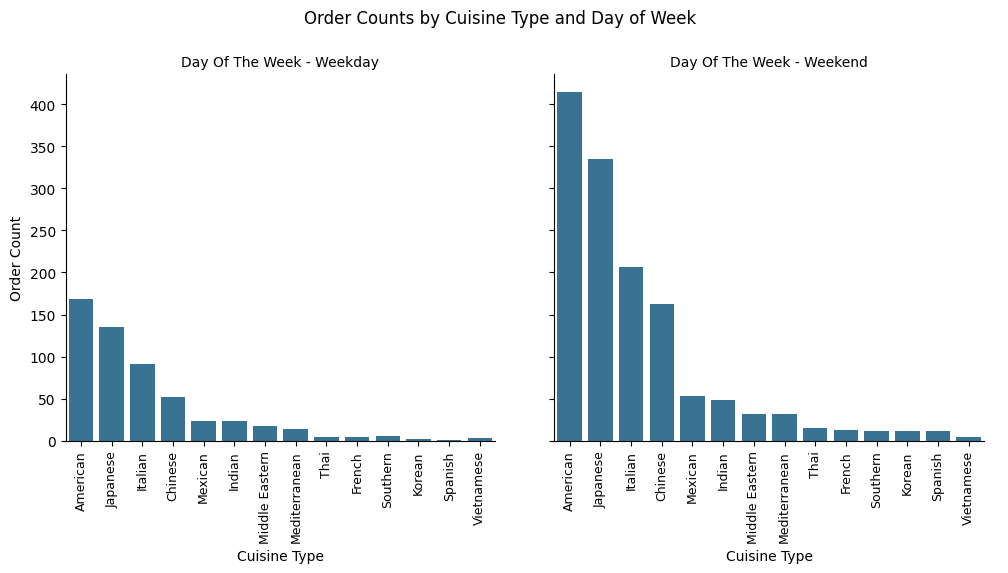

In [29]:
# Retrieve order count by cuisine type and day of the week
df_sum = df.groupby(['cuisine_type','day_of_the_week'])['order_id'].count().reset_index().copy(deep=True)

# Rename the order_id column to order_count
df_sum.rename(columns={'order_id':'order_count'}, inplace = True)

# Create catplot of the numbers of orders by cuisine type and day of the week
ax=sns.catplot(data=df_sum, x='cuisine_type', y='order_count', 
               col='day_of_the_week', kind='bar'
               ,order = df['cuisine_type'].value_counts().index
               ,color='#2A77A2')
ax.set_xticklabels(rotation=90, fontsize=9)
ax.fig.suptitle('Order Counts by Cuisine Type and Day of Week')
ax.set_titles('Day Of The Week - {col_name}')
ax.set_axis_labels('Cuisine Type','Order Count')
ax. edgecolor = "black"
plt.subplots_adjust(top=0.85)
plt.show()

#### Observations:
- The ordered popularity ranking of cuisines ordered does not change between the weekday and weekend

#### Catplot Average Order Cost by Cuisine Type by Day of Week

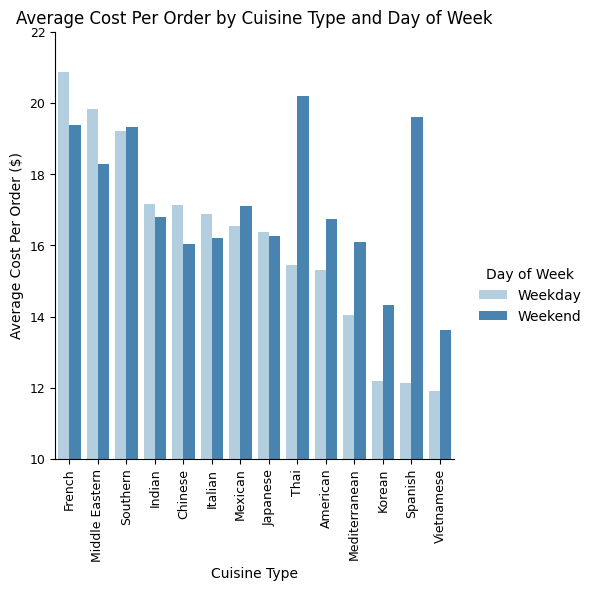

In [30]:
# Create a catplot of the average cost of orders by cuisine type and day of the week
df_mean = df.groupby(['cuisine_type','day_of_the_week'])['cost_of_the_order'].mean().reset_index().copy(deep=True)

# Rename the cost_of_the_order column to avg_cost
df_mean.rename(columns={'cost_of_the_order':'avg_cost'}, inplace = True)

# Create a sorted list of weekday average cost by cuisine type
# This sorted list will be used to sort the plot
df_weekday = df.loc[df['day_of_the_week'] == 'Weekday']

# Retrieve hte average cost of the order by cuisine type and day of the week
df_weekday_mean = df_weekday.groupby(['cuisine_type','day_of_the_week'])['cost_of_the_order'].mean().reset_index().copy(deep=True)

# Rename the cost_of_the_order column to avg_cost
df_weekday_mean.rename(columns={'cost_of_the_order':'avg_cost'}, inplace = True)

# Sort the data by average cost
df_weekday_mean.sort_values(by='avg_cost', ascending=False, inplace = True)

ax=sns.catplot(data=df_mean, x='cuisine_type', y='avg_cost', 
               hue='day_of_the_week', kind='bar'
               ,order = df_weekday_mean['cuisine_type'],
               palette='Blues'
               )

plt.xticks(rotation=90, fontsize=9)
plt.yticks(np.arange(0,24,2), fontsize=9)
plt.ylim(10,)
plt.title('Average Cost Per Order by Cuisine Type and Day of Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost Per Order ($)')
ax._legend.set_title('Day of Week')
plt.show()

#### Observations:
- French, Middle Eastern, Southern cuisines have the highest average cost per order during the weekday
- Spanish and Thai cuisines have the largest increase in average cost per order from the weekday to the weekend

#### Catplot Average Delivery Time by Cuisine Type by Day of Week

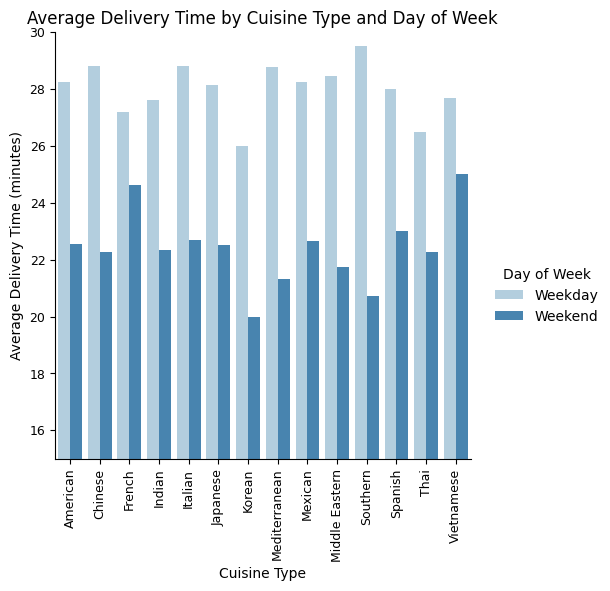

In [31]:
# Retrieve the average delivery time by cuisine type and day of the week
df_mean = df.groupby(['cuisine_type','day_of_the_week'])['delivery_time'].mean().reset_index().copy(deep=True)

# Rename the delivery_time column to avg_delivery_time
df_mean.rename(columns={'delivery_time':'avg_delivery_time'}, inplace = True)

# Create a catplot of the average delivery time by cuisine type and day of the week
ax=sns.catplot(data=df_mean, x='cuisine_type', y='avg_delivery_time', 
               hue='day_of_the_week', kind='bar',
               palette='Blues')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(15,30)
plt.title('Average Delivery Time by Cuisine Type and Day of Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
ax._legend.set_title('Day of Week')
plt.show()

#### Observations:
- All cuisine types have a higher delivery time during the weekday vs the weekend

#### Catplot Average Food Preparation Time by Cuisine Type by Day of Week

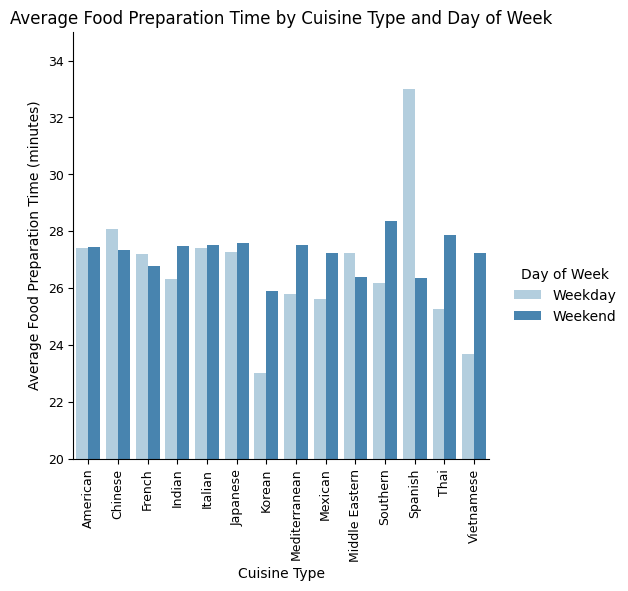

In [32]:
# Retrieve the average food preparation time by cuisine type and day of the week
df_mean = df.groupby(['cuisine_type','day_of_the_week'])['food_preparation_time'].mean().reset_index().copy(deep=True)

# Rename the food_preparation_time column to avg_food_preparation_time
df_mean.rename(columns={'food_preparation_time':'avg_food_preparation_time'}, inplace = True)

# Create a catplot of the average food preparation time by cuisine type and day of the week
ax=sns.catplot(data=df_mean, x='cuisine_type', y='avg_food_preparation_time', 
               hue='day_of_the_week', kind='bar',
               palette='Blues')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(20,35)
plt.title('Average Food Preparation Time by Cuisine Type and Day of Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time (minutes)')
ax._legend.set_title('Day of Week')
plt.show()

#### Observations:
- Spanish cuisines take approximately 6 more minutes to prepare during the weekday than the weekend

#### Catplot Average Revenue Per Order by Cuisine Type and Day of the Week

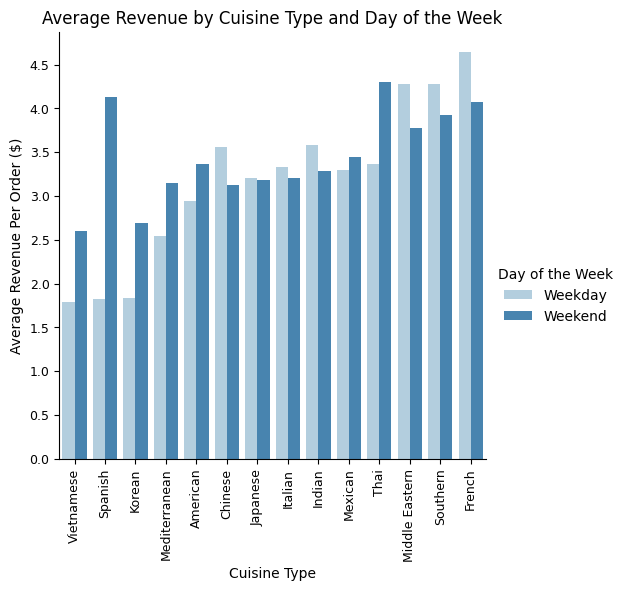

In [33]:
# Create a function to calculate net revenue
def net_revenue(x): 
    # If cost of the order is greater then 20, net revenue is cost times 0.25. round up to 2 decimal places
    if x > 20: 
        x = round((x* 0.25),2)

    # If cost of the order is greater then 5, net revenue is cost times 0.15. round up to 2 decimal places
    elif x > 5:
        x = round((x * 0.15),2)

    # All other costs less than or equal to 5 have no revenue
    else:0
        
    return x # Return the value

# For each value in cost of order, call the net_revenue function. 
# Sum all the returned values for total net revenue
df_copy = df.copy(deep=True)
df_copy['net_revenue'] = df_copy['cost_of_the_order'].apply(net_revenue)

df_sum = df_copy.groupby(['cuisine_type','day_of_the_week'])['net_revenue'].mean().reset_index()

# Rename the net_revenue column to avg_count
df_sum.rename(columns={'net_revenue':'avg_revenue'}, inplace = True)

# Create catplot of the average revenue per order by cuisine type and day of the week
ax=sns.catplot(data=df_sum, x='cuisine_type', y='avg_revenue', 
               hue='day_of_the_week', kind='bar'
               ,order = df_sum.sort_values('avg_revenue').cuisine_type,
               palette='Blues'
              )
plt.xticks(rotation=90, fontsize=9)
plt.yticks(np.arange(0,5,0.5), fontsize=9)
plt.title('Average Revenue by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Revenue Per Order ($)')
ax._legend.set_title('Day of the Week')
plt.show()

#### Observations:
- Spanish cuisine has more than twice revenue per order during the weekend vs the weekday
- French, Middle Eastern, and Southern cuisines have the highest revenue per order for the weekday 
- Thai, Spanish, and French cuisines have the highest revenue per order for the weekend

### ____________________________________________________________________________________________

## Ratings Analysis

#### Catplot Order Counts by Cuisine Type by Rating Provided

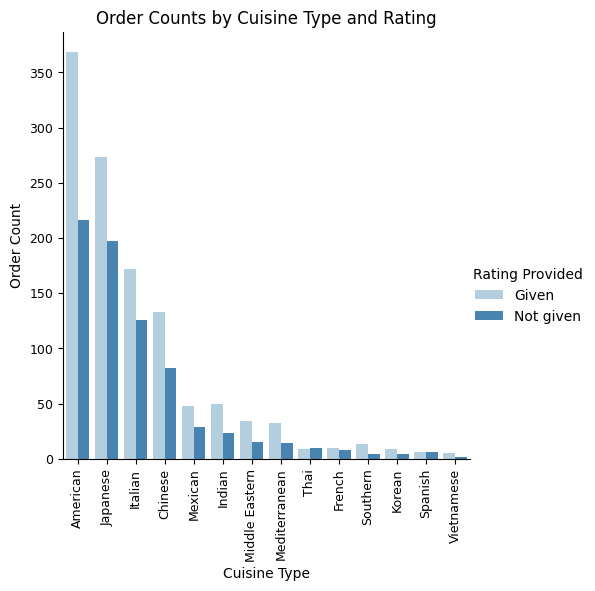

In [34]:
# Make a copy of the dataframe
df_copy = df.copy(deep=True)

# Change the rating value from an integer to 'Given'
for i in range(len(df_copy)):
    if df_copy.iloc[i,6]!='Not given':
       df_copy.iloc[i,6]='Given'

# Retrieve the count of orders by cuisine type and rating    
df_sum = df_copy.groupby(['cuisine_type','rating'])['order_id'].count().reset_index()

# Rename the order_id column to order_count
df_sum.rename(columns={'order_id':'order_count'}, inplace = True)

# Create catplot of order counts by cuisine type and rating provided
ax=sns.catplot(data=df_sum, x='cuisine_type', y='order_count', 
               hue='rating', kind='bar',
               order = df['cuisine_type'].value_counts().index,
               palette='Blues'
              )
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Order Counts by Cuisine Type and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
ax._legend.set_title('Rating Provided')
plt.show()

#### Observations:
- Ratings are generally provided for more than half the orders in each cuisine type.

#### Boxplot Rating by Cuisine Type

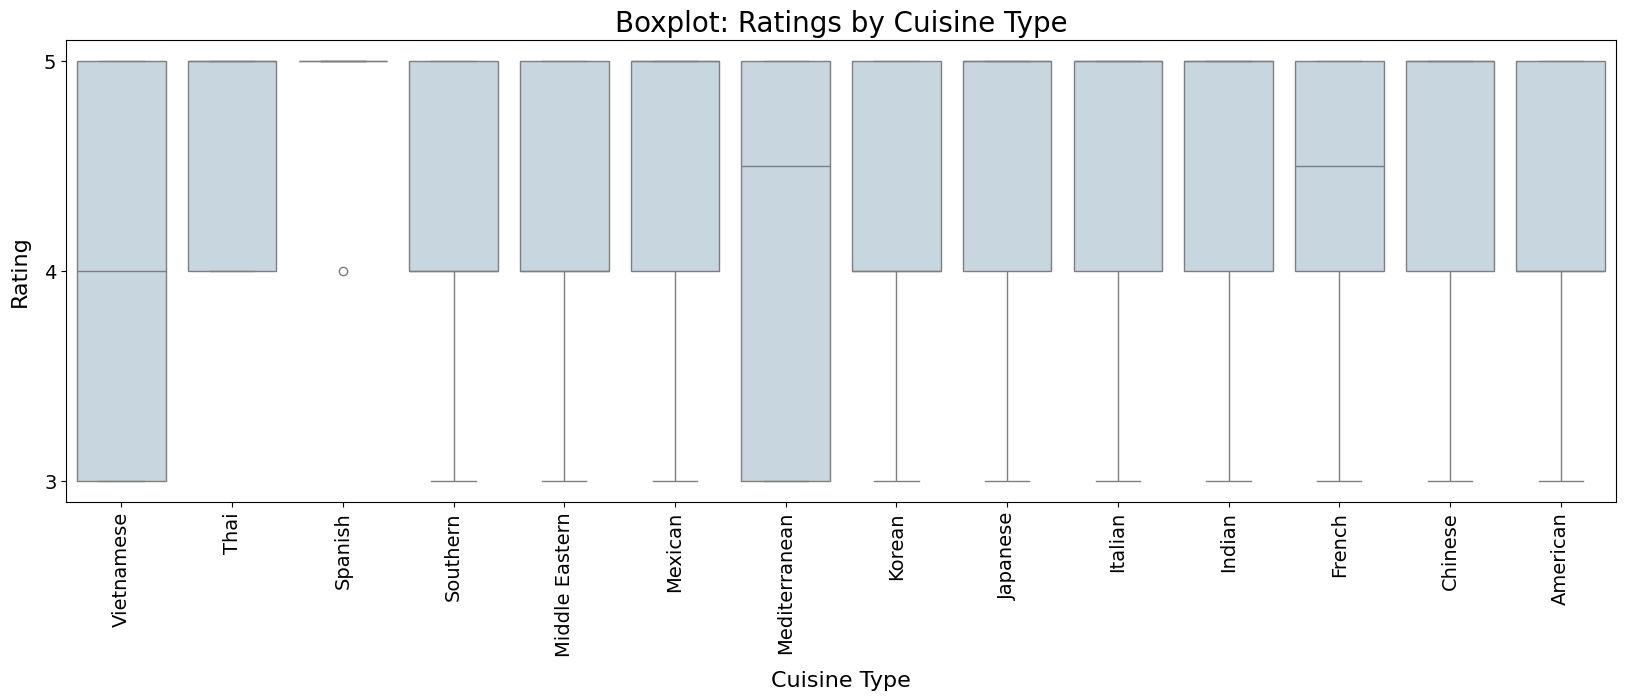

In [35]:
# Make a filtered deep copy of the data only containing orders with ratings
df_rated = df[df['rating']!='Not given'].copy(deep=True) 

# Convert the rating column to a numeric value
#df_rated['rating'] = pd.to_numeric(df_rated['rating']) 
df_rated.sort_values(['rating','cuisine_type'], ascending=False, inplace=True)

# Create boxplot for relationship between rating and cuisine type
plt.figure(figsize=(20,6))
sns.boxplot(data=df_rated, x='cuisine_type', y='rating', color='#C3D7E3')
plt.title('Boxplot: Ratings by Cuisine Type', fontsize=20)
plt.xlabel('Cuisine Type', labelpad=10, fontsize=16)
plt.ylabel('Rating', labelpad=10, fontsize=16)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize=14)
plt.show()

#### Observations:
- Most restaurants have a rating median of 5 with 75% of all ratings between 4 and 5
- Spanish cuisine has an outlier of 4 for a rating
- Vietnamese and Mediterranean restaurants tend to be rated lower than other cuisine types
- There are no ratings less than 3

### ____________________________________________________________________________________________

## Analysis of Restaurants With 10 or More Orders
- 75% of restaurants had order counts of 10 or less
- Analyze the top 25% of restaurants for any insight

#### Create Order List Of Restaurants With 10 or More Orders

In [36]:
# Create dataframe of only those restaurants with 10 or more orders
# Include the customer type for new/repeat customers

############# Restaurant List >= 10 Orders #############################
# Retrieve restaurants with 10 or more orders
df_restaurant = df.groupby(['restaurant_name'])['order_id'].count().reset_index().copy(deep=True)
df_rest_10 = df_restaurant.loc[df_restaurant['order_id']>=10].reset_index()
df_rest_10.drop(['order_id','index'], axis=1, inplace=True)


#--------------------------------------------------------------------

############# Customer Type ##########################################
# Determine whether a customer is new or repeat customer
# Keep the customer id and customer_type columns
df_cust_type = df.groupby(['customer_id'])['order_id'].count().reset_index().copy(deep=True)
df_cust_type.rename(columns={'order_id':'order_count'},inplace=True)
x = df_cust_type['customer_id'].count()
df_cust_type['customer_type']='New User'
for i in range(x):
    if df_cust_type.iloc[i,1] != 1:
        df_cust_type.loc[i,'customer_type'] = 'Repeat User'
df_cust_type.drop(['order_count'], axis=1, inplace=True)       

#---------------------------------------------------------------------

#combine the df_restaurant, df_cust_type, and df into one dataframe
df_combine = pd.merge(df, df_rest_10, how='inner', on='restaurant_name')
df_combine = pd.merge(df_combine, df_cust_type, how='inner', on='customer_id')
df_combine.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,customer_type
0,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,New User
1,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,Repeat User
2,1478284,139885,Blue Ribbon Fried Chicken,American,8.20,Weekend,5,34,17,Repeat User
3,1477324,263426,Blue Ribbon Sushi Izakaya,Japanese,12.13,Weekday,5,30,29,Repeat User
4,1476756,263426,Shake Shack,American,14.07,Weekend,3,21,27,Repeat User


#### Barplot Order Count by Cuisine Type and Customer Type For Restaurants With 10 or More Orders

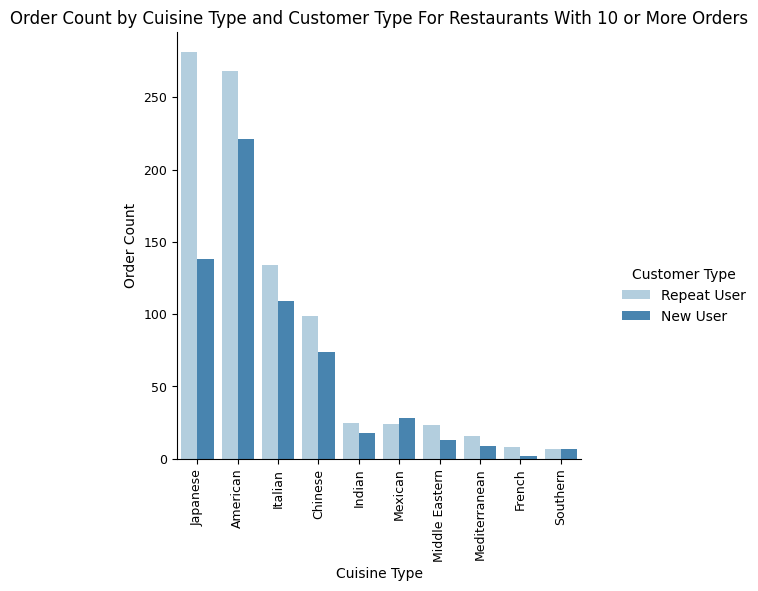

In [37]:
# Retrieve the order counts by customer type and cuisine type
df_combine_count = df_combine.groupby(['customer_type','cuisine_type'])['order_id'].count().reset_index()

# Rename the order_id column to order_count
df_combine_count.rename(columns=({'order_id':'order_count'}),inplace=True)

# Sort the summary data by cost type and order count
df_combine_count.sort_values(['customer_type', 'order_count'], ascending = False, inplace=True)

# Create a catplot of the order count by cuisine type and customer type
ax = sns.catplot(data = df_combine_count, x='cuisine_type', y='order_count', 
                 kind='bar', hue='customer_type', 
                 palette='Blues'
                )
ax._legend.set_title('Customer Type')
plt.title('Order Count by Cuisine Type and Customer Type For Restaurants With 10 or More Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.show()

#### Observations:
For restaurants with 10 or more orders:
- Repeat business accounts for 2/3 of orders for Japanese restaurants
- Japanese restaurants have the highest number of repeat customer orders
- American restaurants have the highest number of new customers

#### Barplot Total Order Cost by Cuisine Type and Customer Type For Restaurants With 10 or More Orders

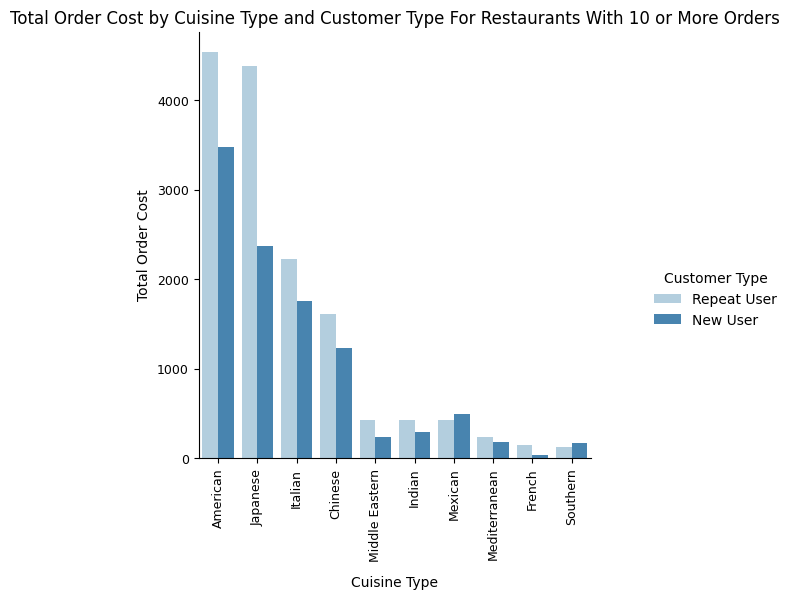

In [38]:
# Retrieve the total cost of orders by customer type and cuisine type
df_combine_cost = df_combine.groupby(['customer_type','cuisine_type'])['cost_of_the_order'].sum().reset_index()

# Rename the cost_of_the_order column to cost_sum
df_combine_cost.rename(columns=({'cost_of_the_order':'cost_sum'}),inplace=True)

# Sort the summary data by cost type and order count
df_combine_cost.sort_values(['customer_type', 'cost_sum'], ascending = False, inplace=True)

# Create a catplot of the total cost by cuisine type and customer type
ax = sns.catplot(data = df_combine_cost, x='cuisine_type', y='cost_sum', 
                 kind='bar', hue='customer_type',
                 palette='Blues')
ax._legend.set_title('Customer Type')
plt.title('Total Order Cost by Cuisine Type and Customer Type For Restaurants With 10 or More Orders')
plt.xlabel('Cuisine Type', labelpad=10)
plt.ylabel('Total Order Cost')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.show()

#### Observations:
For restaurants with 10 or more orders:
- American and Japanese restaurants have the highest total cost of orders for repeat and new users

#### Barplot Average Order Cost by Cuisine Type and Customer Type For Restaurants With 10 or More Orders

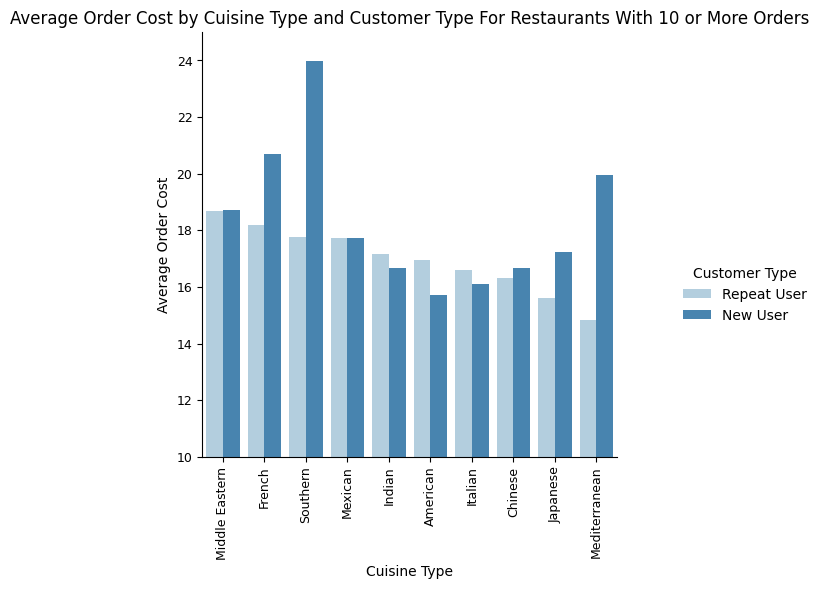

In [39]:
# Retrieve the average cost of orders by customer type and cuisine type
df_combine_avg_cost = df_combine.groupby(['customer_type','cuisine_type'])['cost_of_the_order'].mean().reset_index()

# Rename the cost_of_the_order column to cost_avg
df_combine_avg_cost.rename(columns=({'cost_of_the_order':'cost_avg'}),inplace=True)

# Sort the summary data by cost type and order count
df_combine_avg_cost.sort_values(['customer_type', 'cost_avg'], ascending = False, inplace=True)

# Create a catplot of the average order cost by cuisine type and customer type
ax = sns.catplot(data = df_combine_avg_cost, x='cuisine_type', y='cost_avg',
                 kind='bar', hue='customer_type',
                 palette='Blues'
                )
ax._legend.set_title('Customer Type')
plt.title('Average Order Cost by Cuisine Type and Customer Type For Restaurants With 10 or More Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Order Cost')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(10,25)
plt.show()

#### Observations:
For restaurants with 10 or more orders:
- Southern, French, and Mediterranean restaurants have the highest average order cost for new customers. 
- Middle Eastern, French, and Southern restaurants have the highest average order cost for repeat customers
- New customers tend to spend more at Southern, French, Mediterranean, Japanese, and Chinese restaurants

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:
# Make a filtered deep copy of the data containing only orders with ratings
df_rated = df[df['rating']!='Not given'].copy(deep=True) 

# Convert the rating column to a numeric value
df_rated['rating'] = pd.to_numeric(df_rated['rating']) 

# Calculate the number of orders by restaurant
df_rated_by_rest = df_rated.groupby(['restaurant_name'])['order_id'].count().reset_index()
# Rename the order_id column to order_count
df_rated_by_rest.rename(columns={'order_id':'order_count'}, inplace = True)
# Retrieve the restaurants with an order count greater than 50
df_50 = df_rated_by_rest[df_rated_by_rest.loc[:,'order_count']>50]

# Calculate the mean of ratings by restaurant
df_rated_by_mean = df_rated.groupby(['restaurant_name'])['rating'].mean().reset_index()
# Rename the rating column to avg_rating
df_rated_by_mean.rename(columns={'rating':'avg_rating'}, inplace = True)
# Retrieve the restaurants with a rating mean greater than 4
df_rating = df_rated_by_mean[df_rated_by_mean.loc[:,'avg_rating']>4]

# Merge the 2 series to determine restaurants with an order count > 50 and a rating > 4
df_result = pd.merge(df_50, df_rating, how='inner', on='restaurant_name')

# Display the result
print('The following list contains restaurants that have more than 50 orders and a rating greater than 4:')
cnt=df_result['restaurant_name'].count()
for i in range(cnt):
    print(f'{i+1}) Restaurant: {df_result.iloc[i,0]:<27} \
    Order count: {df_result.iloc[i,1]:<5} \
    Average rating: {df_result.iloc[i,2]:.2f}')    


The following list contains restaurants that have more than 50 orders and a rating greater than 4:
1) Restaurant: Blue Ribbon Fried Chicken       Order count: 64        Average rating: 4.33
2) Restaurant: Blue Ribbon Sushi               Order count: 73        Average rating: 4.22
3) Restaurant: Shake Shack                     Order count: 133       Average rating: 4.28
4) Restaurant: The Meatball Shop               Order count: 84        Average rating: 4.51


#### Observations:
 - There are 4 restaurants with more than 50 orders and a rating greater than 4.
 - The restaurants are: 
     - Blue Ribbon Fried Chicken
     - Blue Ribbon Sushi
     - Shake Shack
     - The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [55]:
# Create a function to calculate net revenue
def net_revenue(x): 
    # If cost of the order is greater then 20, net revenue is cost times 0.25. round up to 2 decimal places
    if x > 20: 
        x = round((x* 0.25),2)

    # If cost of the order is greater then 5, net revenue is cost times 0.15. round up to 2 decimal places
    elif x > 5:
        x = round((x * 0.15),2)

    # All other costs less than or equal to 5 have no revenue
    else:0
        
    return x # Return the value

# For each value in cost of order, call the net_revenue function. 
# Sum all the returned values for total net revenue
print('The total net revenue is: $',df['cost_of_the_order'].apply(net_revenue).sum(), sep='')

The total net revenue is: $133500.50410000002


In [54]:
# Create a function to calculate net revenue
def net_revenue(x): 
    # If cost of the order is greater then 20, net revenue is cost times 0.25. round up to 2 decimal places
    if x > 20: 
        return x* 0.25

    # If cost of the order is greater then 5, net revenue is cost times 0.15. round up to 2 decimal places
    elif x > 5:
        return x * 0.15

    # All other costs less than or equal to 5 have no revenue
    else: return 0
        
    #return x # Return the value

df_rev = df['cost_of_the_order'].apply(net_revenue)
df_rev.head()
# For each value in cost of order, call the net_revenue function. 
# Sum all the returned values for total net revenue
print('The total net revenue is: $',df_rev.sum(), sep='')

The total net revenue is: $6166.303


#### Observations:
 - The total net revenue is \\$6,209.24

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [43]:
# Retrieve the total number of orders
total_orders_count = df['order_id'].count() 

# Retrieve the total number of orders with a processing time of over 60 minutes
filtered_order_count = df.loc[df['food_preparation_time'] + df['delivery_time']>60]['order_id'].count() 

# Print the percentage of orders taking longer than 60 minutes to fulfill
print('The percentage of orders taking more than 60 minutes to be delivered', 
      'from the time the order is placed is {:.2f}'.format(filtered_order_count/total_orders_count*100))



The percentage of orders taking more than 60 minutes to be delivered from the time the order is placed is 10.54


#### Observations:

- The percentage of orders taking more than 60 minutes to be delivered from the time the order is placed is 10.54

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# Group the data by day of the week and calculate the mean delivery time
df_mean = df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()

# Rename the delivery time column to avg_delivery_time
df_mean.rename(columns={'delivery_time':'avg_delivery_time'}, inplace=True)

# Print the average delivery times for the weekday and weekend 
df_mean.iloc[0,0]
for i in range(len(df_mean)):
    print('Average delivery time for the', str(df_mean.iloc[i,0]).lower(), 'is', round(df_mean.iloc[i,1],2), 'minutes')

Average delivery time for the weekday is 28.34 minutes
Average delivery time for the weekend is 22.47 minutes


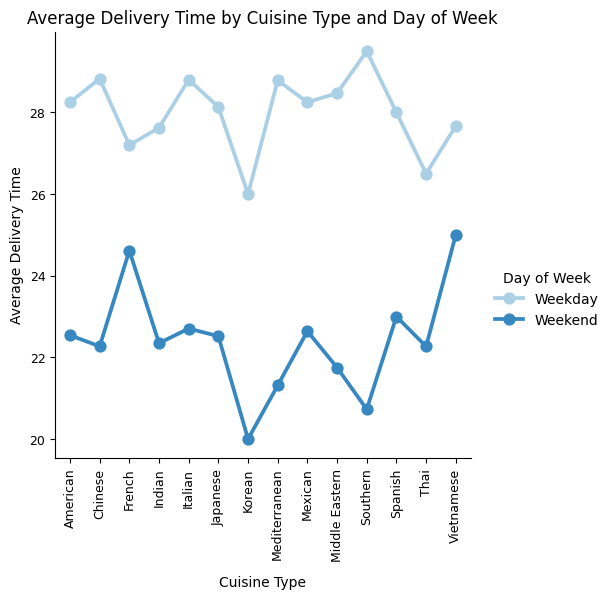

In [45]:
# Retrieve the average delivery time by cuisine type and day of th week
df_mean = df.groupby(['cuisine_type','day_of_the_week'])['delivery_time'].mean().reset_index().copy(deep=True)

# Rename the delivery time column to avg_delivery_time
df_mean.rename(columns={'delivery_time':'avg_delivery_time'}, inplace = True)

#Create a catplot of the average delivery time by cuisine type and day of the week
ax=sns.catplot(data=df_mean, x='cuisine_type', y='avg_delivery_time', 
               hue='day_of_the_week', kind='point',
               palette='Blues')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Average Delivery Time by Cuisine Type and Day of Week')
plt.xlabel('Cuisine Type', labelpad=10)
plt.ylabel('Average Delivery Time')
ax._legend.set_title('Day of Week')
plt.show()

#### Observations:
- The average weekday delivery time is 28.34 minutes compared to the weekend delivery time of 22.47 minutes
- The variance between delivery times for days of the week is similar across all cuisine types indicating a possible traffic  or driver concern. Examining the day and time the orders were received and who was the driver is needed for further investigation

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The dataset extract received from Foodhub has had customer profiles, demand periods, restaurant cost and revenues, and customer ratings examined. Using descriptive analysis and visualizations, some conclusions and recommendations have been made: 

#### Customer Analysis:
- Repeat customers represent approximately 60% of orders placed
- A third of application users are repeat customers. Investigate user friendliness of the application
- At higher order count restaurants, Japanese cuisine has the highest repeat business
- At higher order count restaurants, American cuisine has the highest new business
- At higher order count restaurants, new customers tend to spend more at Southern, French, and Mediterranean places
- At higher order count restaurants, repeat customers tend to spend more at Middle Eastern, French, and Southern places

#### Day of Week Analysis:
- Most orders occur during the weekend
- American cuisine is the most popular type of cuisine throughout the week. Shake Shack is the overall leader in sales
- Delivery times are greater during the weekday leading to a need for further investigation
- Preparation times are materially higher for Spanish restaurants during the weekday than the weekend

#### Revenue and Cost Analysis:
- A third of all orders placed are from 5 restaurants creating risk if any of these restaurants leave Foodhub
- Only 25% of restaurants have an order count greater than 10, leading to growth potential
- The average revenue per order is between \\$2.50 and $4 dollars
- For each cuisine type, as the number of restaurants increases, so does the total order cost and order counts
- French food has the highest average cost per order followed by Middle Eastern and Southern cuisines
- Spanish cuisine has more than twice the revenue generated per order during the weekend vs the weekday
- Spanish and Thai cuisines have the highest percentage increase in average cost per order from the weekday to the weekend
- French, Middle Eastern, and Southern cuisines have the highest revenue per order for the weekday
- Thai, Spanish, and French cuisines have the highest revenue per order for the weekend

#### Rating Analysis:
- There are no ratings of 1 or 2. Customers occasionally leave negative ratings when service is poor
- Most restaurants are rated on average between 4 and 5 stars
- Vietnamese and Mediterranean restaurants tend to be rated lower than other cuisine types

### Recommendations:
- Improve converting new users of the application into repeat customers through a reward program
- Offer a promotional discount on orders over a certain price point to increase sales and generate new customers
- Meet with the top 5 restaurants to learn how the application has improved their online order process. Seek to understand how they promote the use of the application. This information can be used to further increase sales in other restaurants and gain new restaurants
- Discuss with low order restaurants the potential to reduce delivery costs by pushing customers to Foodhub instead of using inhouse delivery drivers
- Weekday delivery times are approximately 6 minutes higher than the weekend times for all restaurants. Examine any delivery data such as time of day, day of week, miles driven and driver assigned to learn more of the cause of the delay
- Encourage users of the application to rate their order
- Solicit or allow customers to provide feedback on the application itself
- Examine the rating process to determine if there is an issue with customers entering ratings of 1 or 2
- Create a reporting package for restaurants providing:
    - New/repeat customers analysis
    - Average order cost information
    - Average food preparation time information
    - Day of week analysis
    - Rating analysis
    - Do not share competitor information